In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# import Lib

In [ ]:
import torch
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, precision_recall_fscore_support, \
    confusion_matrix
from sklearn.svm import SVC
import re
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm
tqdm.pandas()

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

#def func

In [ ]:
def compute_metrics(pred,ground_labels):
    labels_all = ground_labels
    preds_all = list(pred)
    
    precision, recall, f1, _ = precision_recall_fscore_support(labels_all, preds_all)
    acc = accuracy_score(labels_all, preds_all)
    confusion_mat = confusion_matrix(labels_all, preds_all)
    # tn, fp, fn, tp = confusiton_mat.ravel()
    out_dict = {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall,
        'confusiton_mat': confusion_mat
    }
    return out_dict

# read data

###new 


In [ ]:
FEATURE_RESULT_PATH = config.feature_result_path

In [ ]:
Sementic_features= [
                    'url_count', 
                    'qn_symbol', 
                    'num_chars', 
                    'num_words', 
                    'num_sentences', 
                    'num_exclamation', 
                    'words_per_sentence',  
                    'characters_per_word',
                    'punctuations_per_sentence', 
                    'get_sentiment_polarity',  
                    'lexical_diversity',
                    'content_word_diversity',
                    'redundancy',
                    'noun',
                    'verb',
                    'adj',
                    'adv',
                    "qn_symbol_per_sentence",
                    "num_exclamation_per_sentence",
                    "url_count_per_sentence"
                    ]

columns_to_select = sementic_features + ["split","lang"] + config.TEXT + config.ID + config.LABEL

In [ ]:
df = {}
for key,value in FEATURE_RESULT_PATH.items():
    df[key]=pd.read_csv(value["semantic"])

In [ ]:
for key in df:
  dfcolumns=df[key].columns
  df[key]=df[key][[i for i in columns_to_select if i in dfcolumns]]

  df[key]["qn_symbol_per_sentence"]=df[key]["qn_symbol"]/df[key]["num_sentences"]
  df[key]["num_exclamation_per_sentence"]=df[key]["num_exclamation"]/df[key]["num_sentences"]
  df[key]["url_count_per_sentence"]=df[key]["url_count"]/df[key]["num_sentences"]
  
sementic_features =  sementic_features

In [ ]:
dfAll=df["fakenewsnet"].append(df["isot"],ignore_index = True).append(df["kagglerealfake"],ignore_index = True).append(df["liar"],ignore_index = True).append(df["welfake"],ignore_index = True).append(df["codalab"],ignore_index = True)

In [ ]:
dfAll.source.value_counts()

welfake           62718
kaggle            38646
isot              22282
fakenewsnet       21724
liar              12765
codalab           10699
kagglerealfake     6060
Name: source, dtype: int64

In [ ]:
dfAll.source.value_counts()

welfake           62718
kaggle            38646
isot              22282
fakenewsnet       21724
liar              12765
codalab           10699
kagglerealfake     6060
Name: source, dtype: int64

In [ ]:
from IPython.display import display, HTML
# CSS = """
# .output {
#     flex-direction: row;
# }
# """ 

# HTML('<style>{}</style>'.format(CSS))
df_summary={}
for key in df:
  print(key,"\n")
  dis=df[key].describe()
  df_summary[key]=dis
  display(dis)

fakenewsnet 



url_count  ...  url_count_per_sentence
count  21724.000000  ...            21724.000000
mean       0.000138  ...                0.000138
std        0.011751  ...                0.011751
min        0.000000  ...                0.000000
25%        0.000000  ...                0.000000
50%        0.000000  ...                0.000000
75%        0.000000  ...                0.000000
max        1.000000  ...                1.000000

[8 rows x 21 columns]

isot 



url_count  ...  url_count_per_sentence
count  22282.000000  ...            22282.000000
mean       0.010592  ...                0.001461
std        0.130164  ...                0.026317
min        0.000000  ...                0.000000
25%        0.000000  ...                0.000000
50%        0.000000  ...                0.000000
75%        0.000000  ...                0.000000
max        6.000000  ...                1.000000

[8 rows x 22 columns]

kaggle 



url_count  ...  url_count_per_sentence
count  38646.00000  ...            38646.000000
mean       0.09587  ...                0.010866
std        0.47124  ...                0.069638
min        0.00000  ...                0.000000
25%        0.00000  ...                0.000000
50%        0.00000  ...                0.000000
75%        0.00000  ...                0.000000
max       22.00000  ...                2.166667

[8 rows x 21 columns]

kagglerealfake 



url_count  ...  url_count_per_sentence
count  6060.000000  ...             6060.000000
mean      0.126238  ...                0.012321
std       0.935485  ...                0.141769
min       0.000000  ...                0.000000
25%       0.000000  ...                0.000000
50%       0.000000  ...                0.000000
75%       0.000000  ...                0.000000
max      31.000000  ...                7.750000

[8 rows x 21 columns]

liar 



url_count  ...  url_count_per_sentence
count    12765.0  ...                 12765.0
mean         0.0  ...                     0.0
std          0.0  ...                     0.0
min          0.0  ...                     0.0
25%          0.0  ...                     0.0
50%          0.0  ...                     0.0
75%          0.0  ...                     0.0
max          0.0  ...                     0.0

[8 rows x 20 columns]

welfake 



url_count  ...  url_count_per_sentence
count  62718.000000  ...            62718.000000
mean       0.098233  ...                0.011268
std        0.776956  ...                0.107999
min        0.000000  ...                0.000000
25%        0.000000  ...                0.000000
50%        0.000000  ...                0.000000
75%        0.000000  ...                0.000000
max      119.000000  ...                9.666667

[8 rows x 22 columns]

codalab 



url_count  ...  url_count_per_sentence
count  10699.000000  ...            10699.000000
mean       0.690532  ...                0.497268
std        0.906157  ...                0.599598
min        0.000000  ...                0.000000
25%        0.000000  ...                0.000000
50%        1.000000  ...                0.333333
75%        1.000000  ...                1.000000
max       52.000000  ...                4.000000

[8 rows x 20 columns]

## Processing data (no run)

In [ ]:
# data=df.drop(columns=["content_word_diversity_and_redundancy","nvaa","14_emo_dict","8_emo_dict"])

In [ ]:
# data.loc[df['punctuations_per_sentence'] >9].shape

In [ ]:
# data1=df.loc[df['url_count'] <5]
# data1=data1.loc[df['qn_symbol'] <10]
# data1=data1.loc[df['num_chars'] <6000]
# data1=data1.loc[df['words_per_sentence'] <100]
# data1=data1.loc[df['characters_per_word'] <6]
# data1=data1.loc[df['punctuations_per_sentence'] <20]
# data1=data1.loc[df['negative'] <10]
# data1=data1.loc[df['positive'] <10]
# data1=df.loc[df['punctuations_per_sentence'] <10]


In [ ]:
# f = pd.melt( data1, id_vars='label', value_vars=features)
# g = sns.FacetGrid( f, hue='label', col="variable", col_wrap=5, sharex=False, sharey=False ,legend_out=True )
# g = g.map( sns.histplot, "value").add_legend() #kde=True to trend line

In [ ]:
# columns=df.columns.drop(["title","text","content","highest_14_emo_label","highest_8_emo_label","lang"]).tolist()
# features=df.columns.drop(["title","text","content","lang","label","highest_14_emo_label","highest_8_emo_label"]).tolist()
# emot=["anger","anticipation","disgust","fear","joy","sadness","surprise","trust"]
# emot_null=['anger_null','anticipation_null','disgust_null','fear_null','joy_null','sadness_null','surprise_null','trust_null']
# sementic=[x for x in features if (x not in emot ) and (x not in emot_null) and (x not in ["negative","positive"] )]

In [ ]:
# data=df[columns]

In [ ]:
# data=data.astype({'label': 'int64'})
# data=data.reset_index(drop=True)
# data=data[sementic+["label"]]

In [ ]:
# for i in emot:
#   df[i+"_null"]=np.where(df[i]==0,1,0)

In [ ]:
# df.head()

In [ ]:
# fake = data.loc[data['label'] == 1]
# true = data.loc[data['label'] == 0]

In [ ]:
# true.describe()

In [ ]:
# fake.describe()

In [ ]:
# data=true.append(fake).sample(frac=1).reset_index(drop=True)

## new features(no run)

In [ ]:
# data["verb_noun_ratio"]=(data["verb"])/(data["noun"])
# data["adj_adv_ratio"]=(data["adj"])/(data["adv"])
# data["verb_noun_ratio"].replace([np.inf, -np.inf,np.nan], 0 ,inplace=True)
# data["adj_adv_ratio"].replace([np.inf, -np.inf,np.nan], 0 ,inplace=True)

In [ ]:
# data.loc[data["adj_adv_ratio"]==np.inf]

In [ ]:
# sementic+=["verb_noun_ratio","adj_adv_ratio"]

In [ ]:
# X=data[sementic]
# Y=data.label

In [ ]:
# data.info()   

In [ ]:
# data.head()

In [ ]:
# data.describe()

In [ ]:
# f = pd.melt( data[emot+["label"]], id_vars='label', value_vars=emot)

# g = sns.catplot(x="label" ,y="value",
#                 col="variable",col_wrap=5,
#                 data=f, kind="violin",sharey=False,sharex=False);

# analyse df

## FakeNewsNet

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


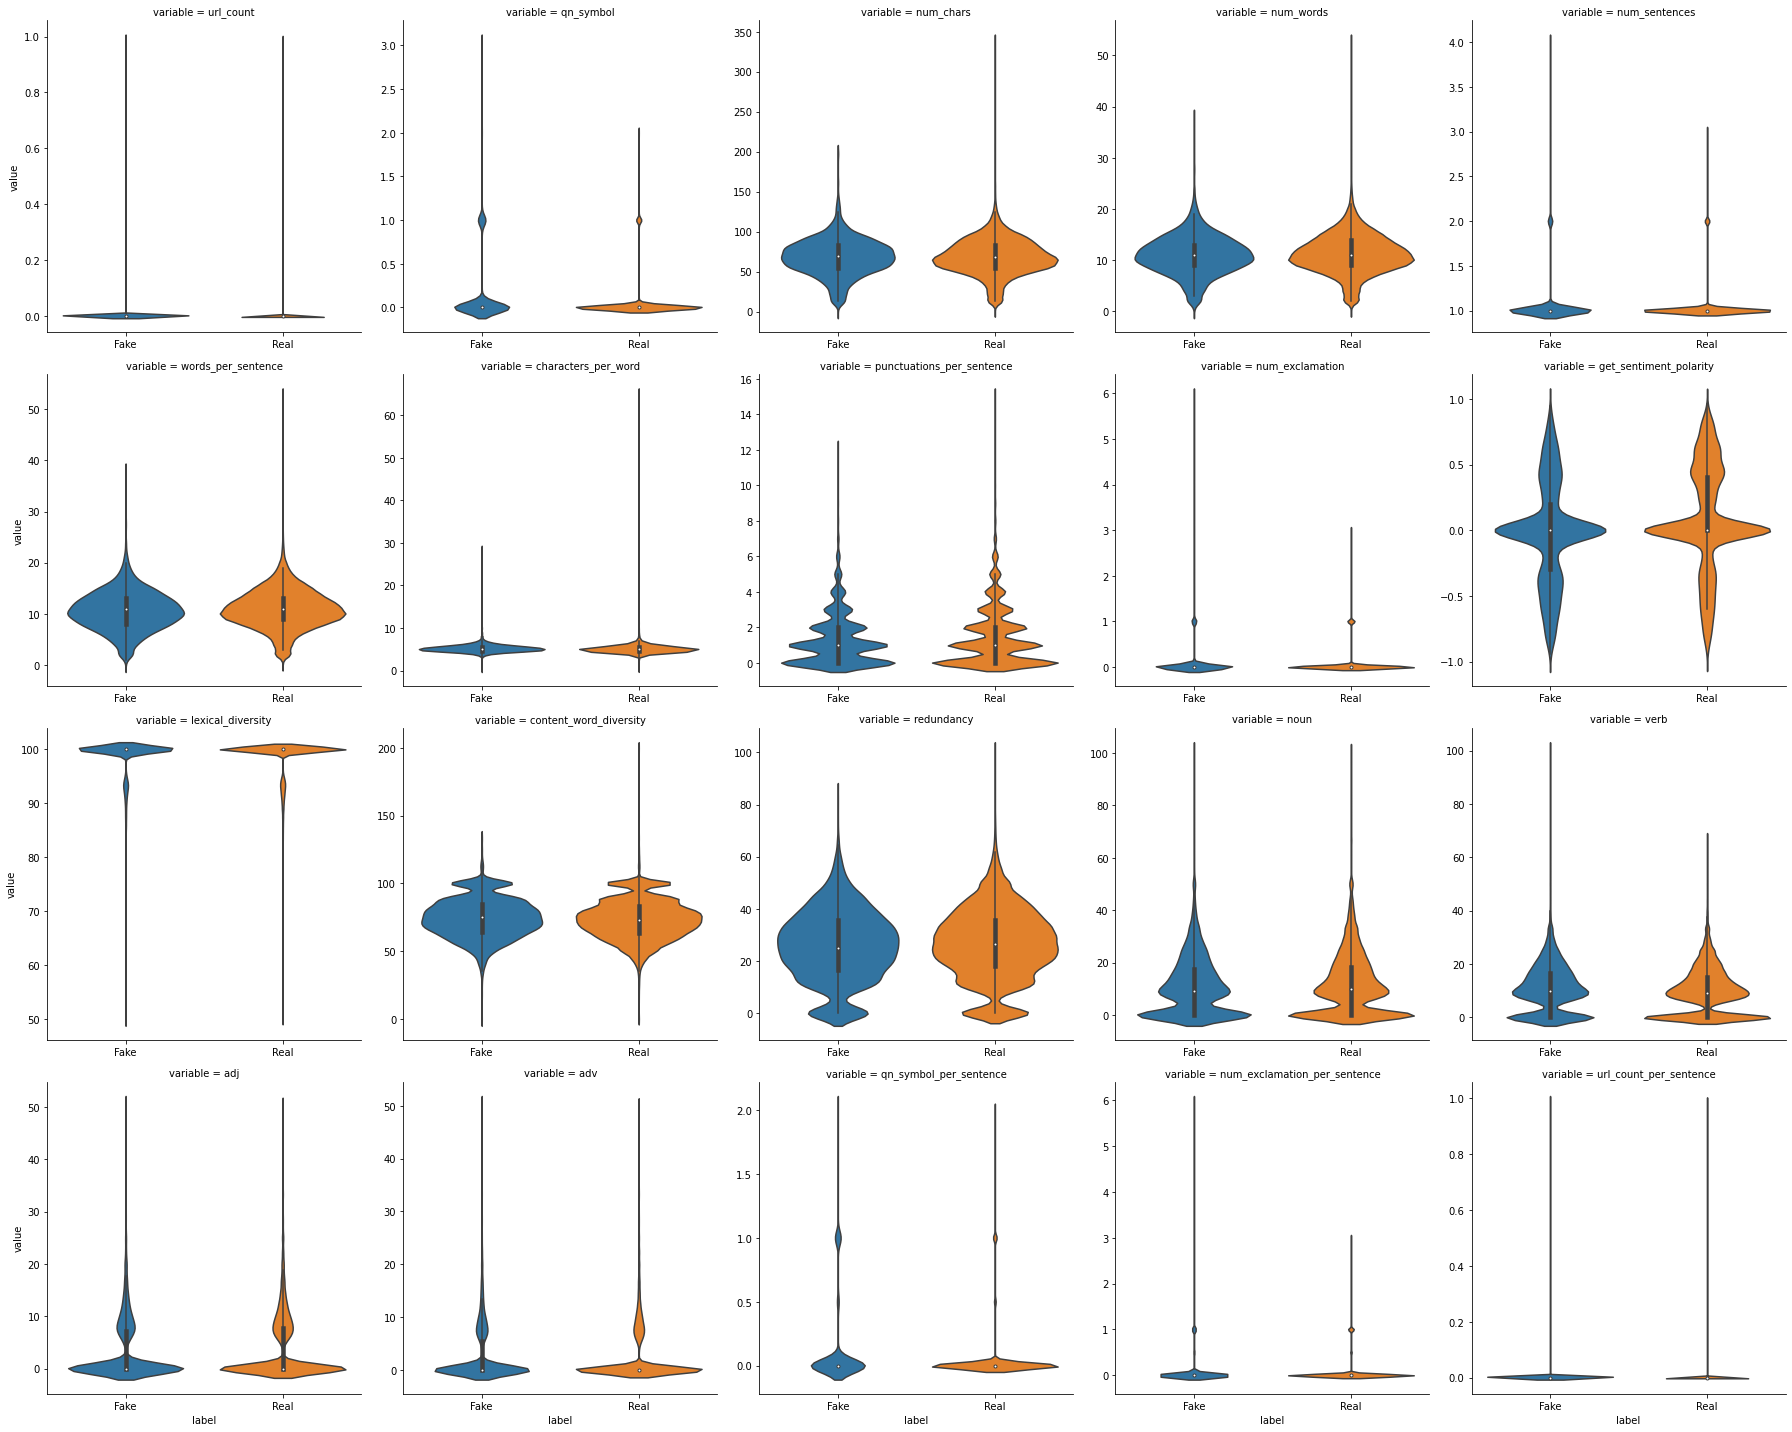

In [ ]:
f = pd.melt( df["fakenewsnet"], id_vars='label', value_vars=sementic_features)

g = sns.catplot(x="label" ,y="value",
                col="variable",col_wrap=5,
                data=f, kind="violin",sharey=False,sharex=False);

## ISOT

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


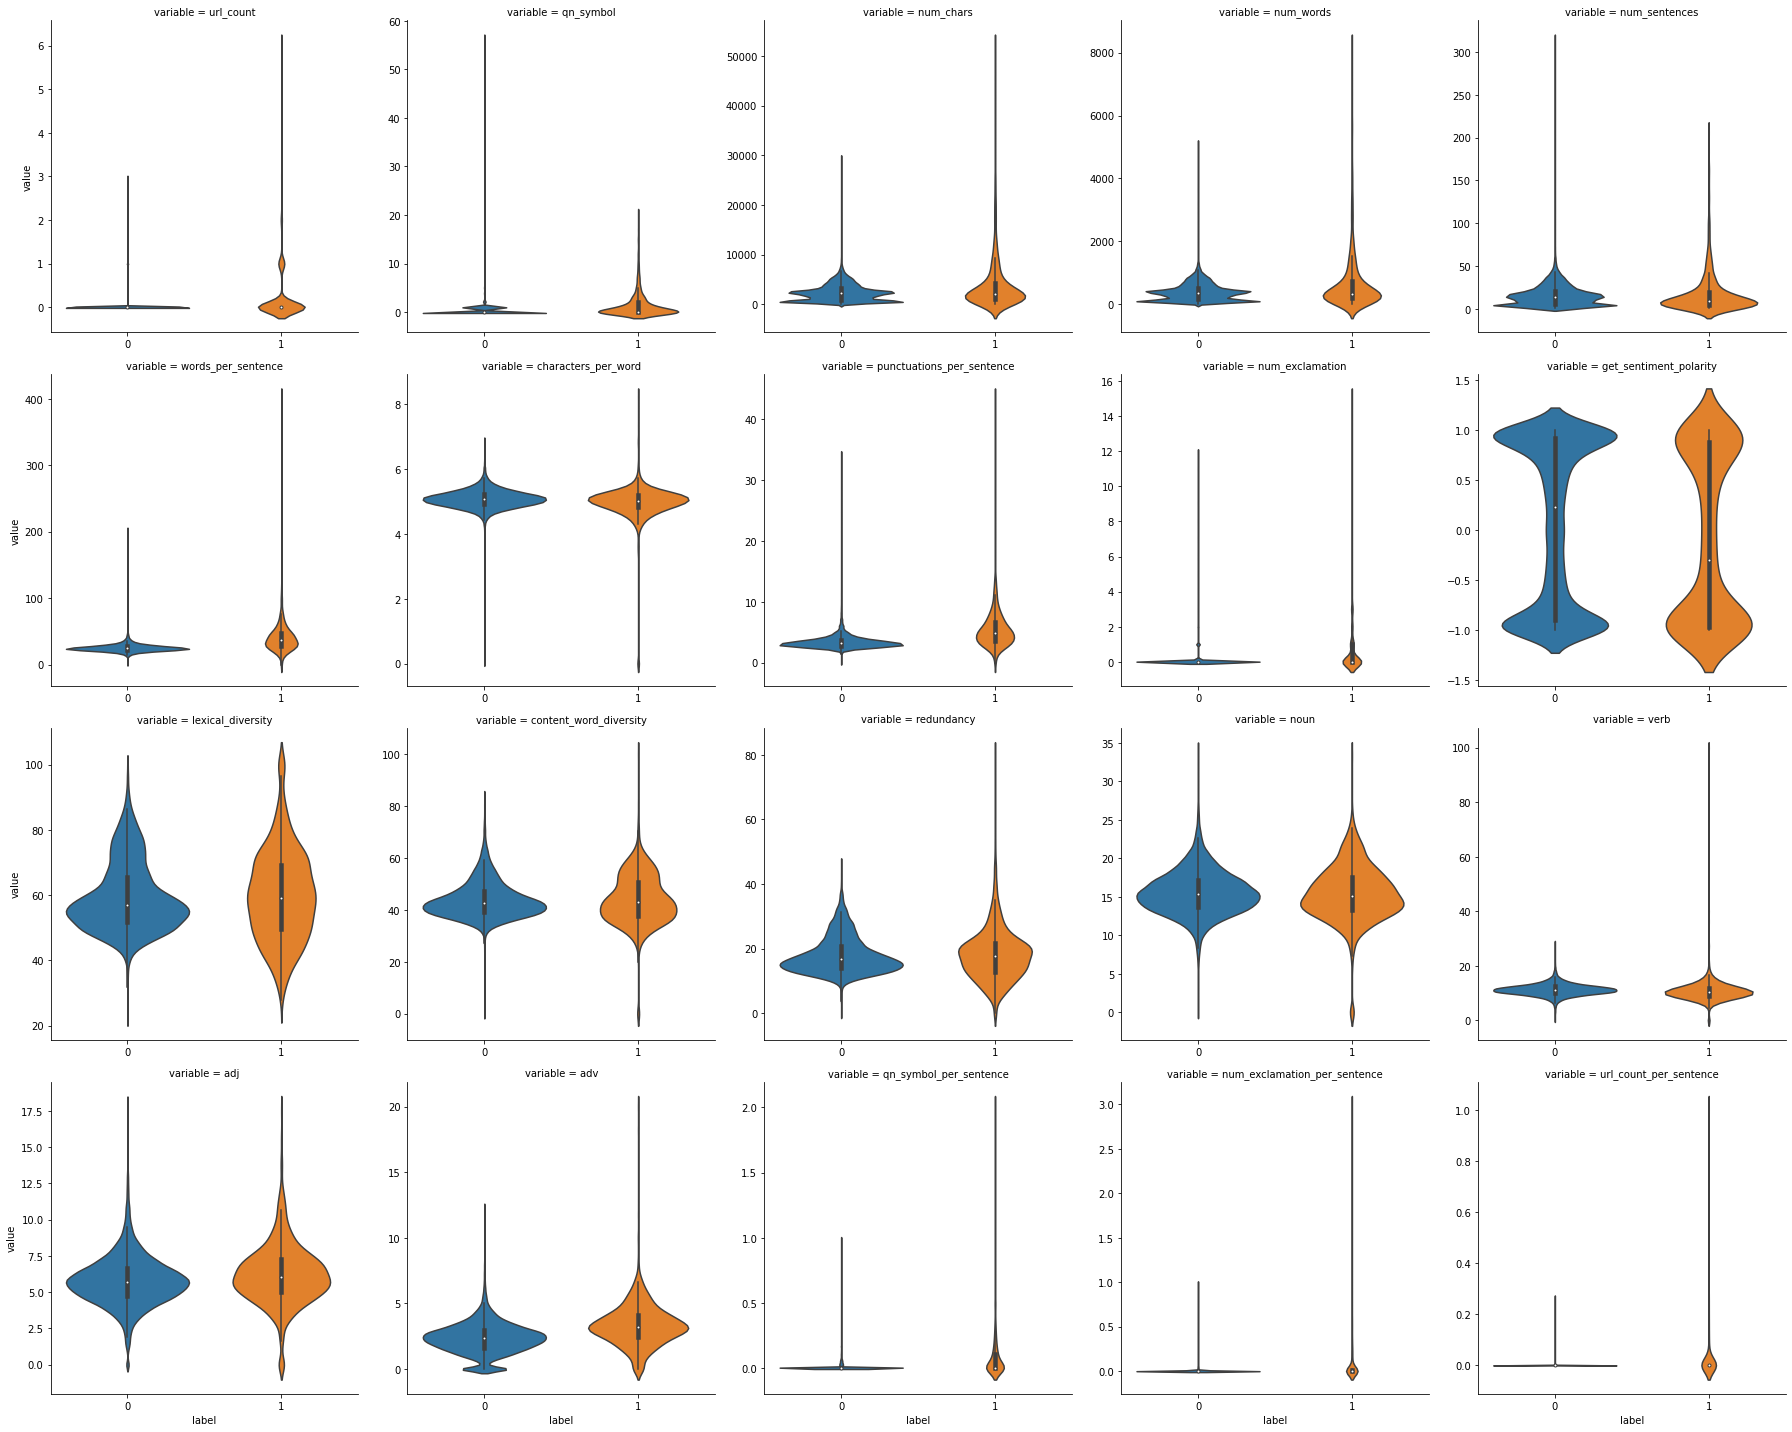

In [ ]:
f = pd.melt( df["isot"], id_vars='label', value_vars=sementic_features)

g = sns.catplot(x="label" ,y="value",
                col="variable",col_wrap=5,
                data=f, kind="violin",sharey=False,sharex=False);

## Kaggle

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


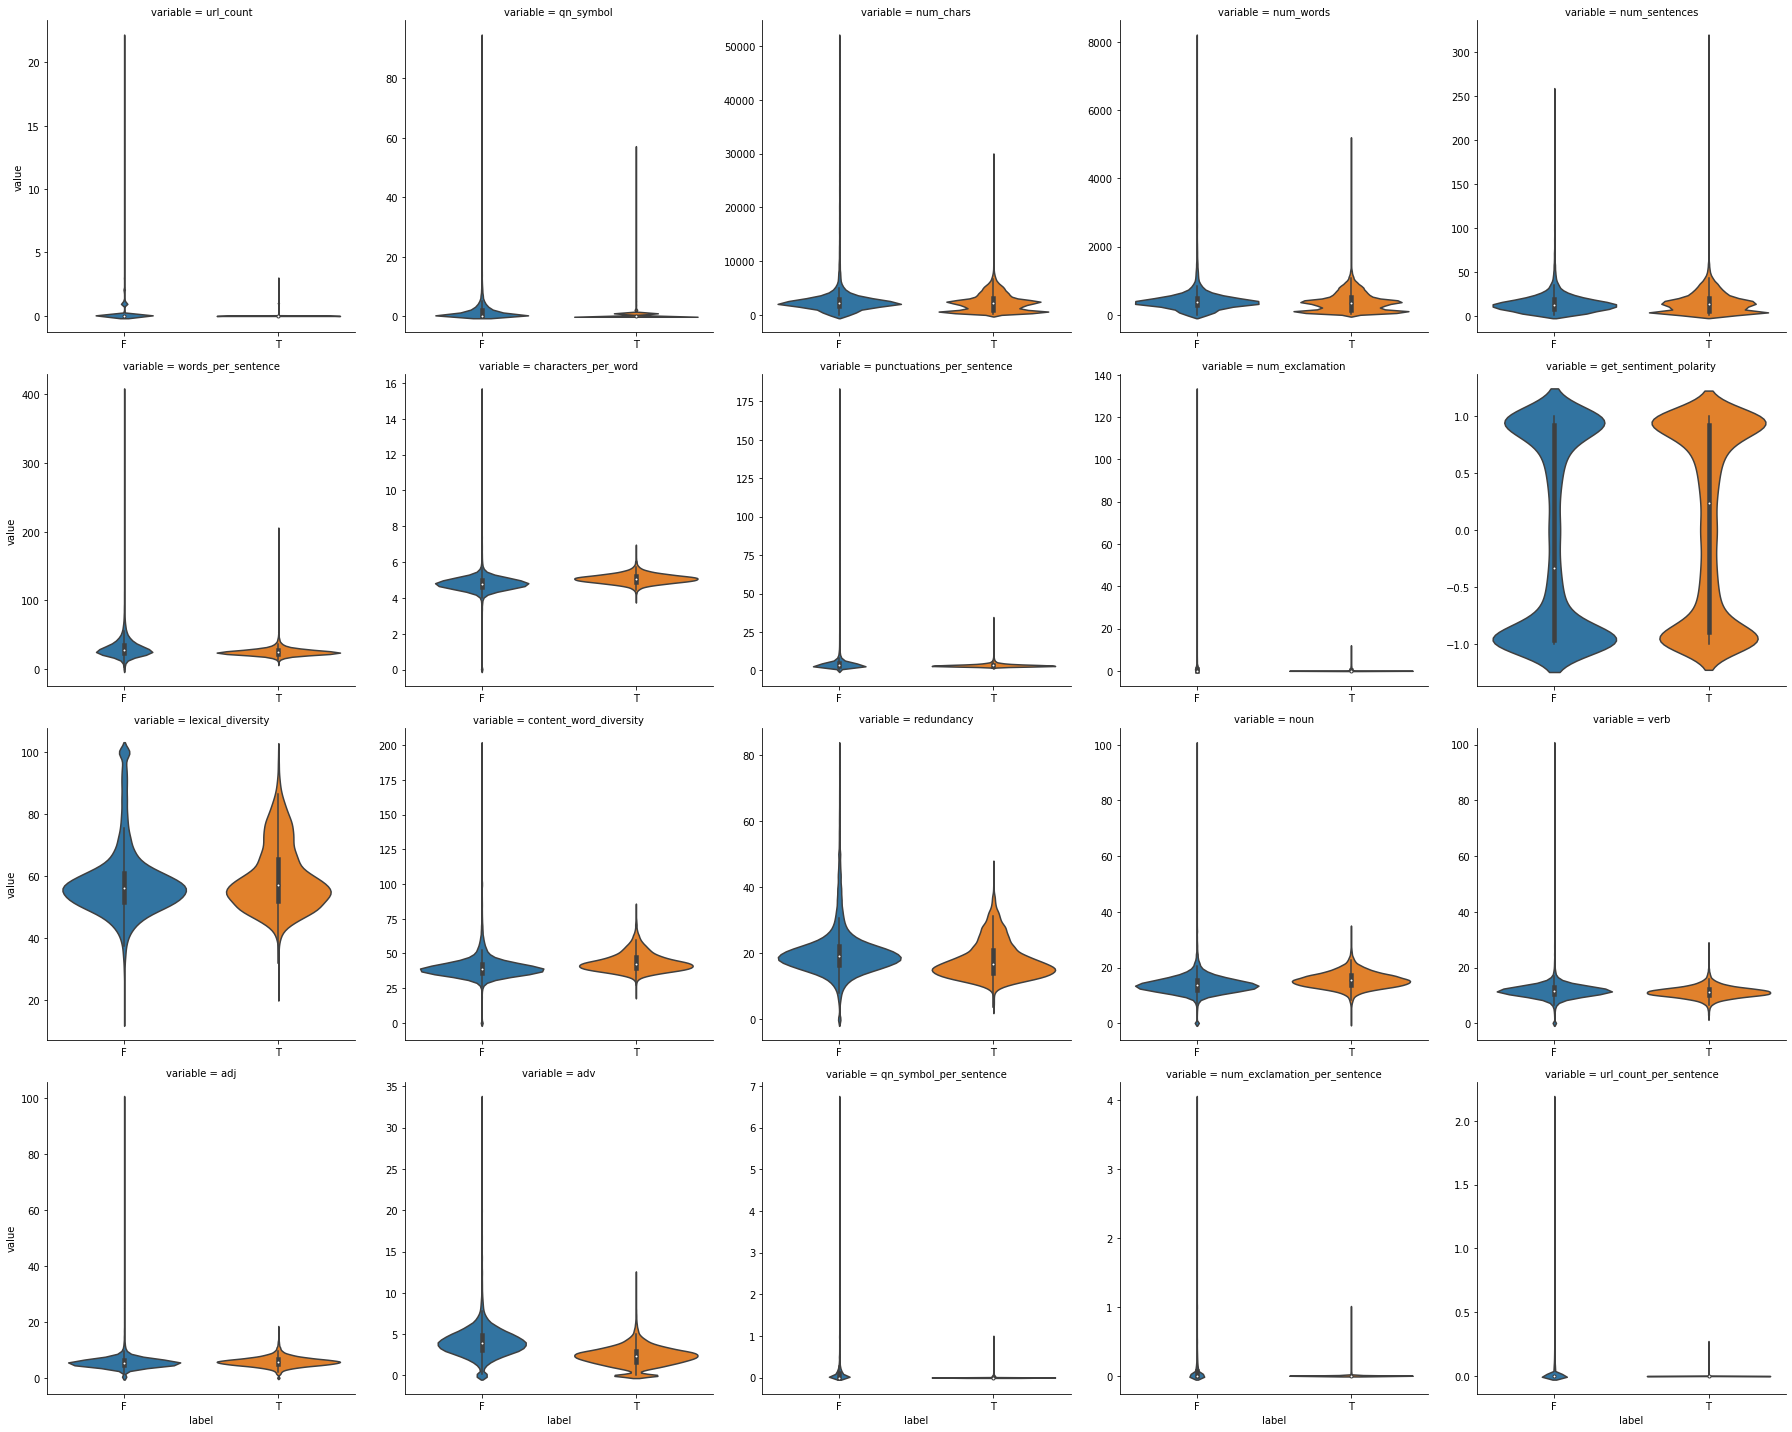

In [ ]:
f = pd.melt( df["kaggle"], id_vars='label', value_vars=sementic_features)

g = sns.catplot(x="label" ,y="value",
                col="variable",col_wrap=5,
                data=f, kind="violin",sharey=False,sharex=False);

## kaggleRealFake

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


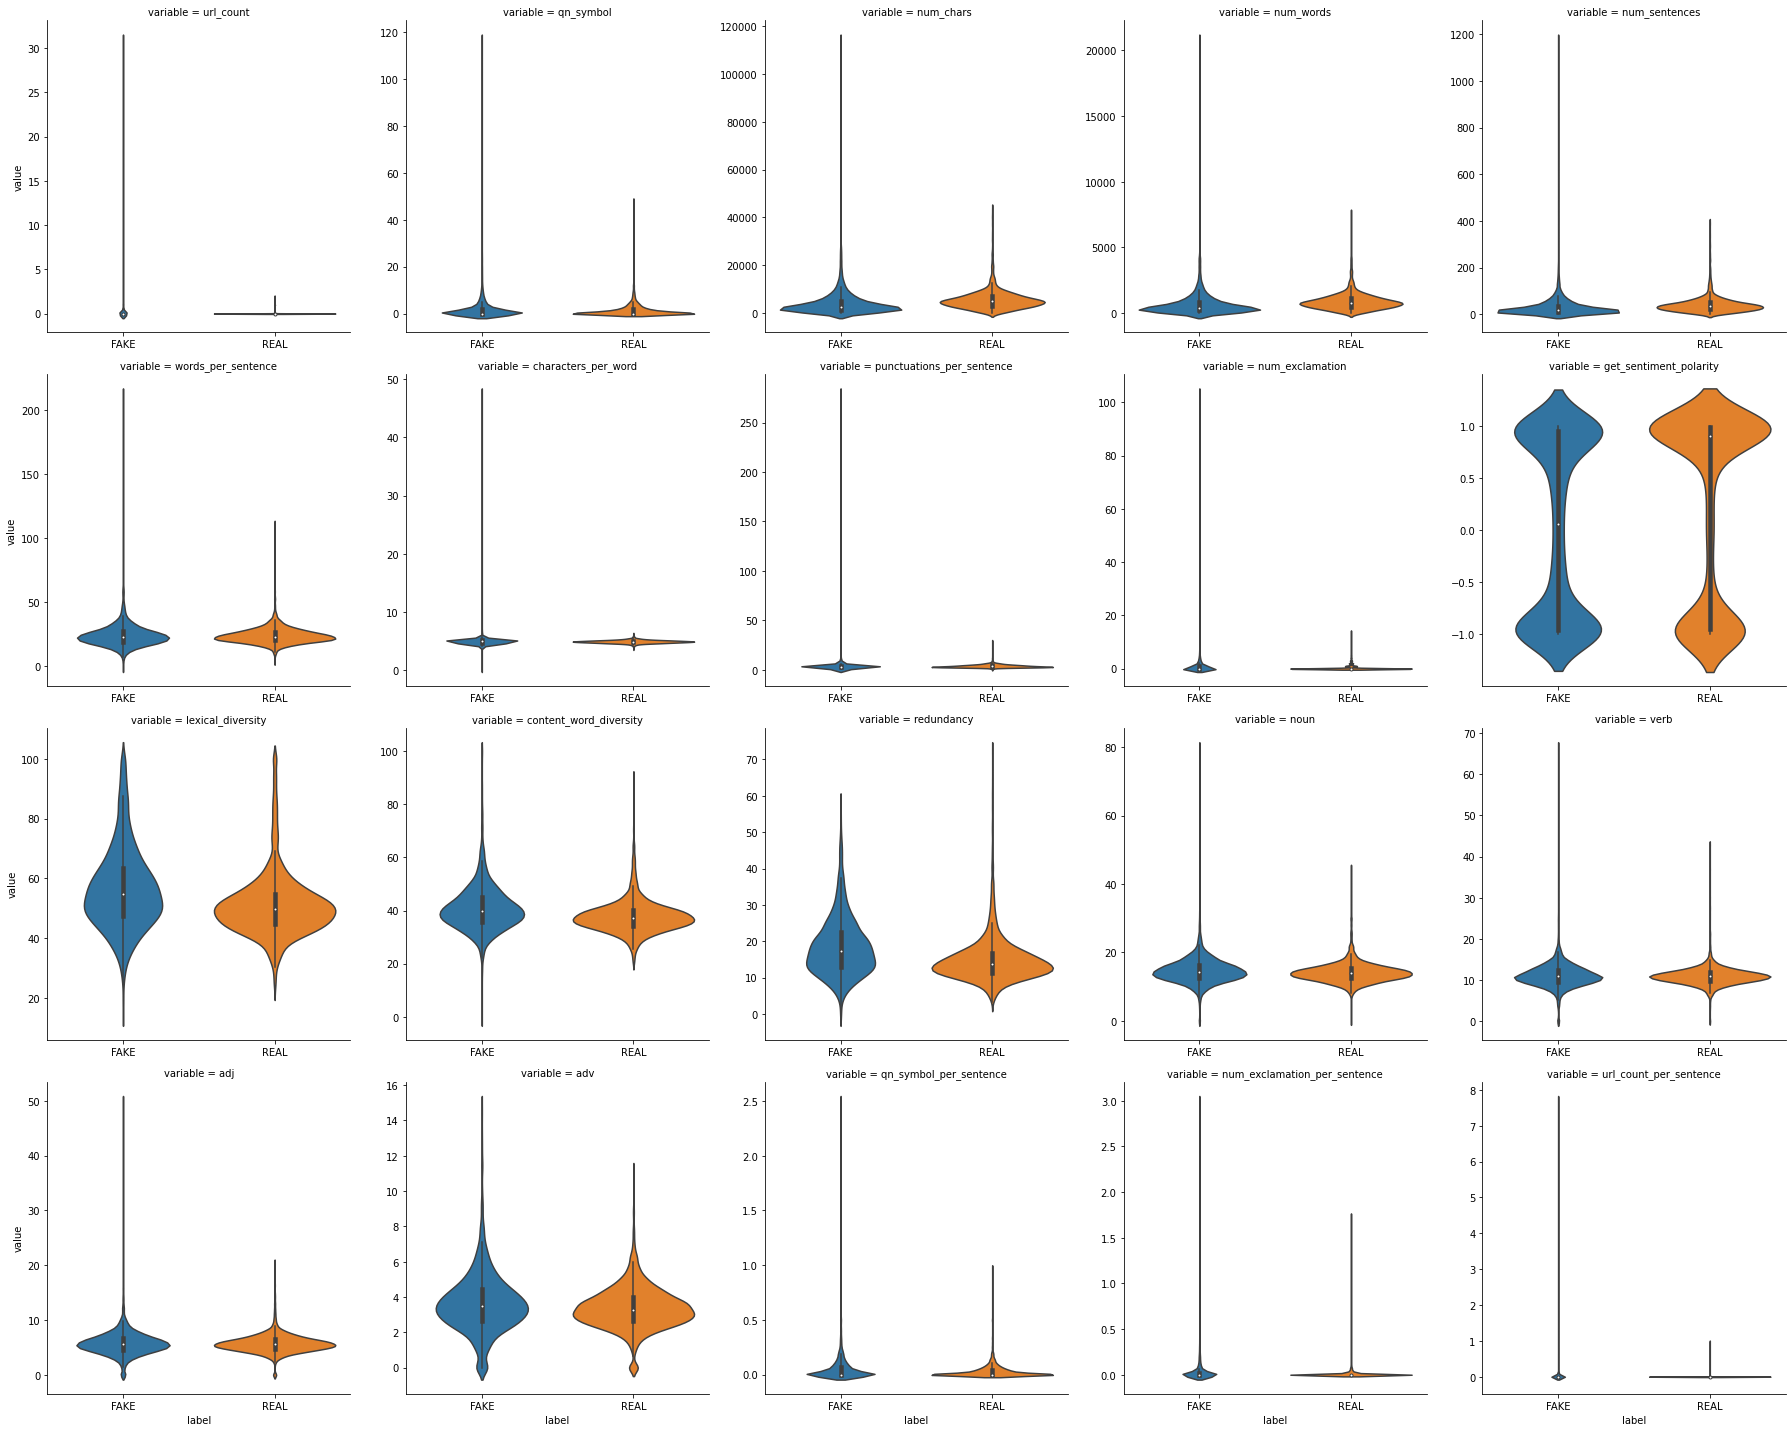

In [ ]:
f = pd.melt( df["kagglerealfake"], id_vars='label', value_vars=sementic_features)

g = sns.catplot(x="label" ,y="value",
                col="variable",col_wrap=5,
                data=f, kind="violin",sharey=False,sharex=False);

## Codalab

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


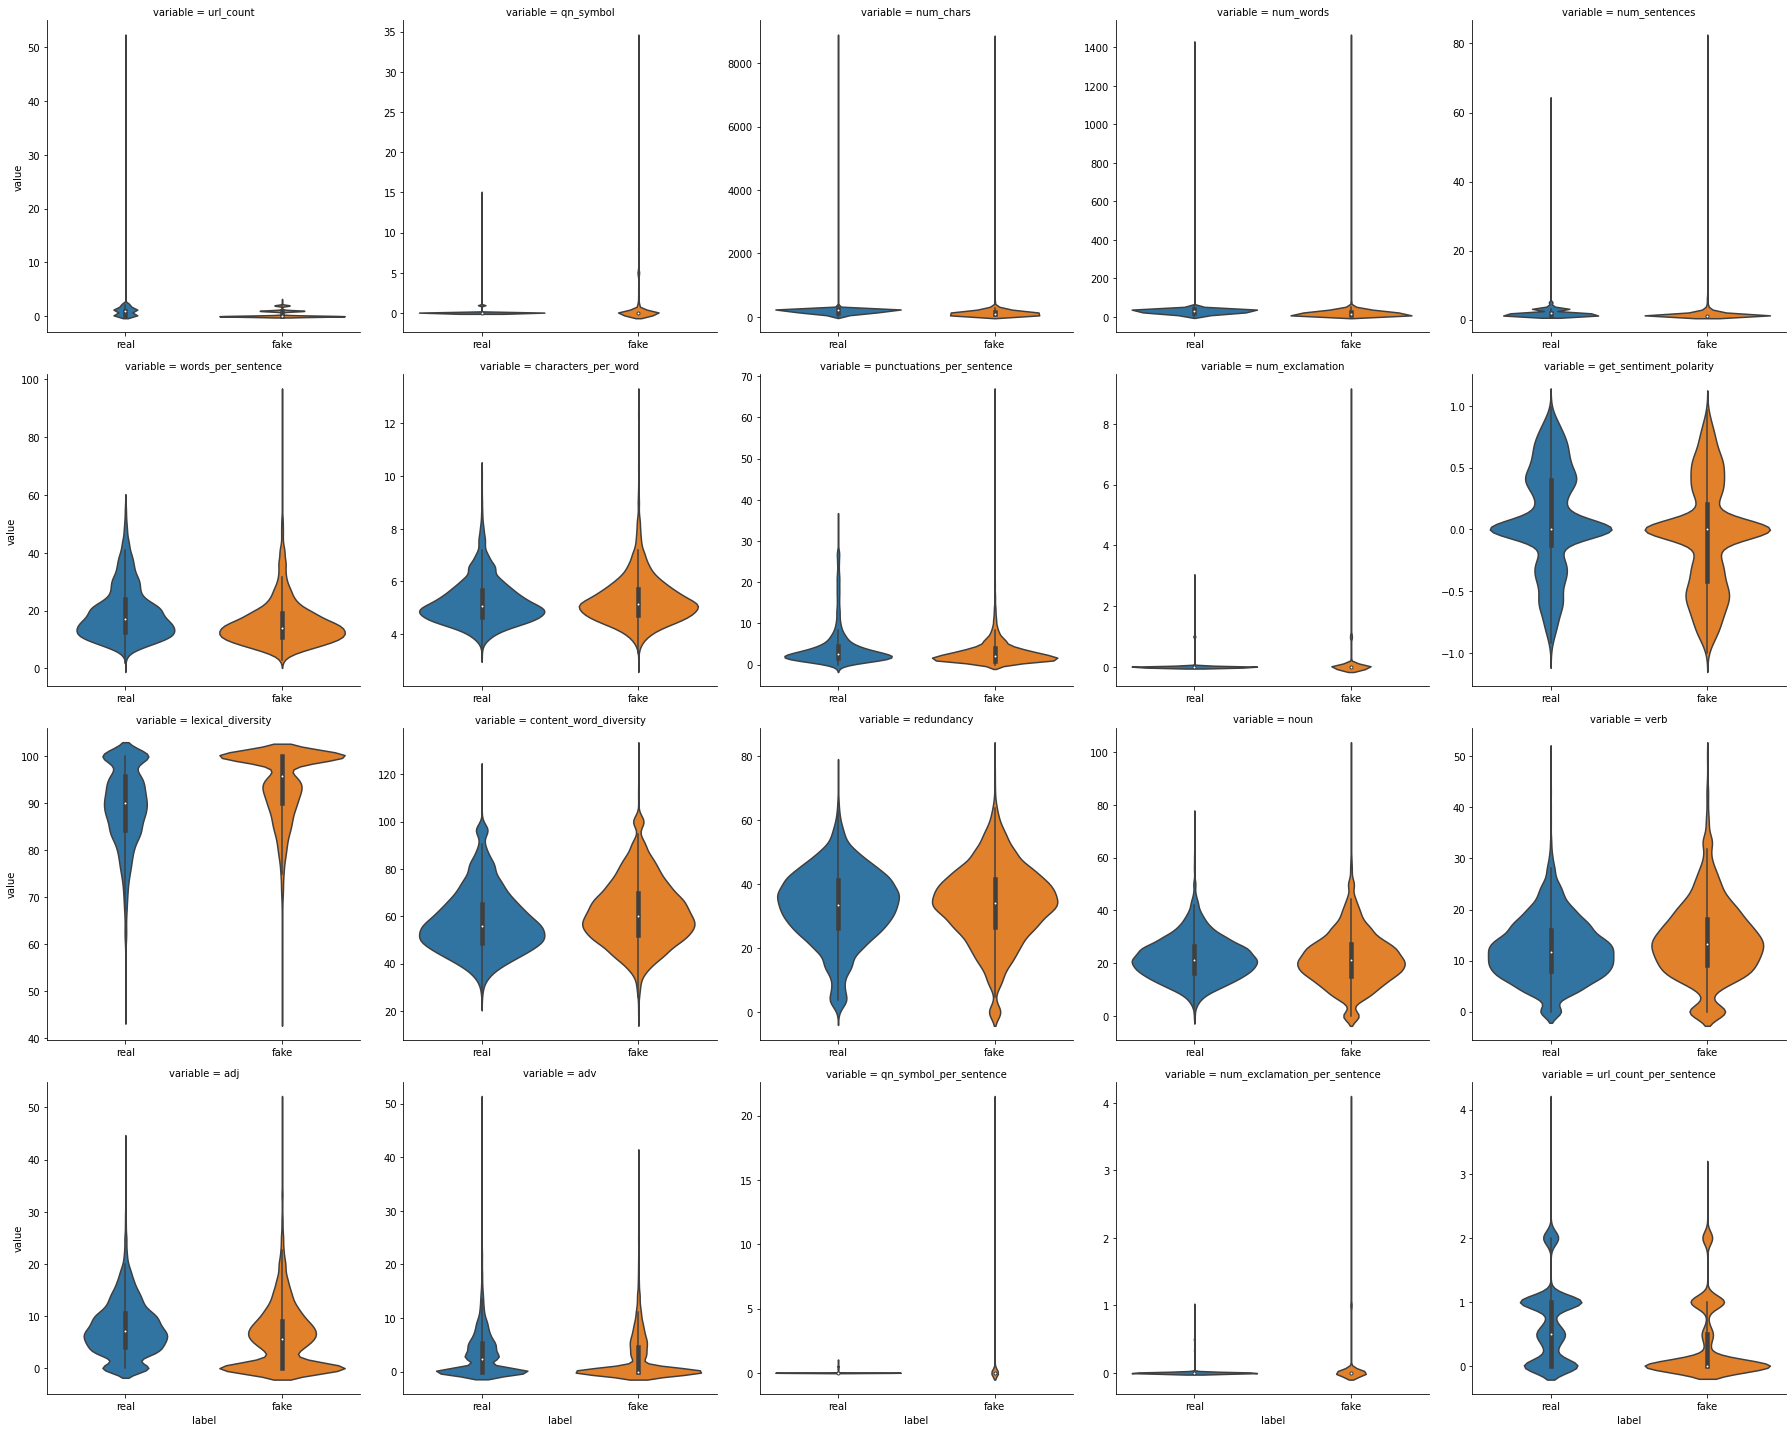

In [ ]:
f = pd.melt( df["codalab"], id_vars='label', value_vars=sementic_features)

g = sns.catplot(x="label" ,y="value",
                col="variable",col_wrap=5,
                data=f, kind="violin",sharey=False,sharex=False);

## Liar

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


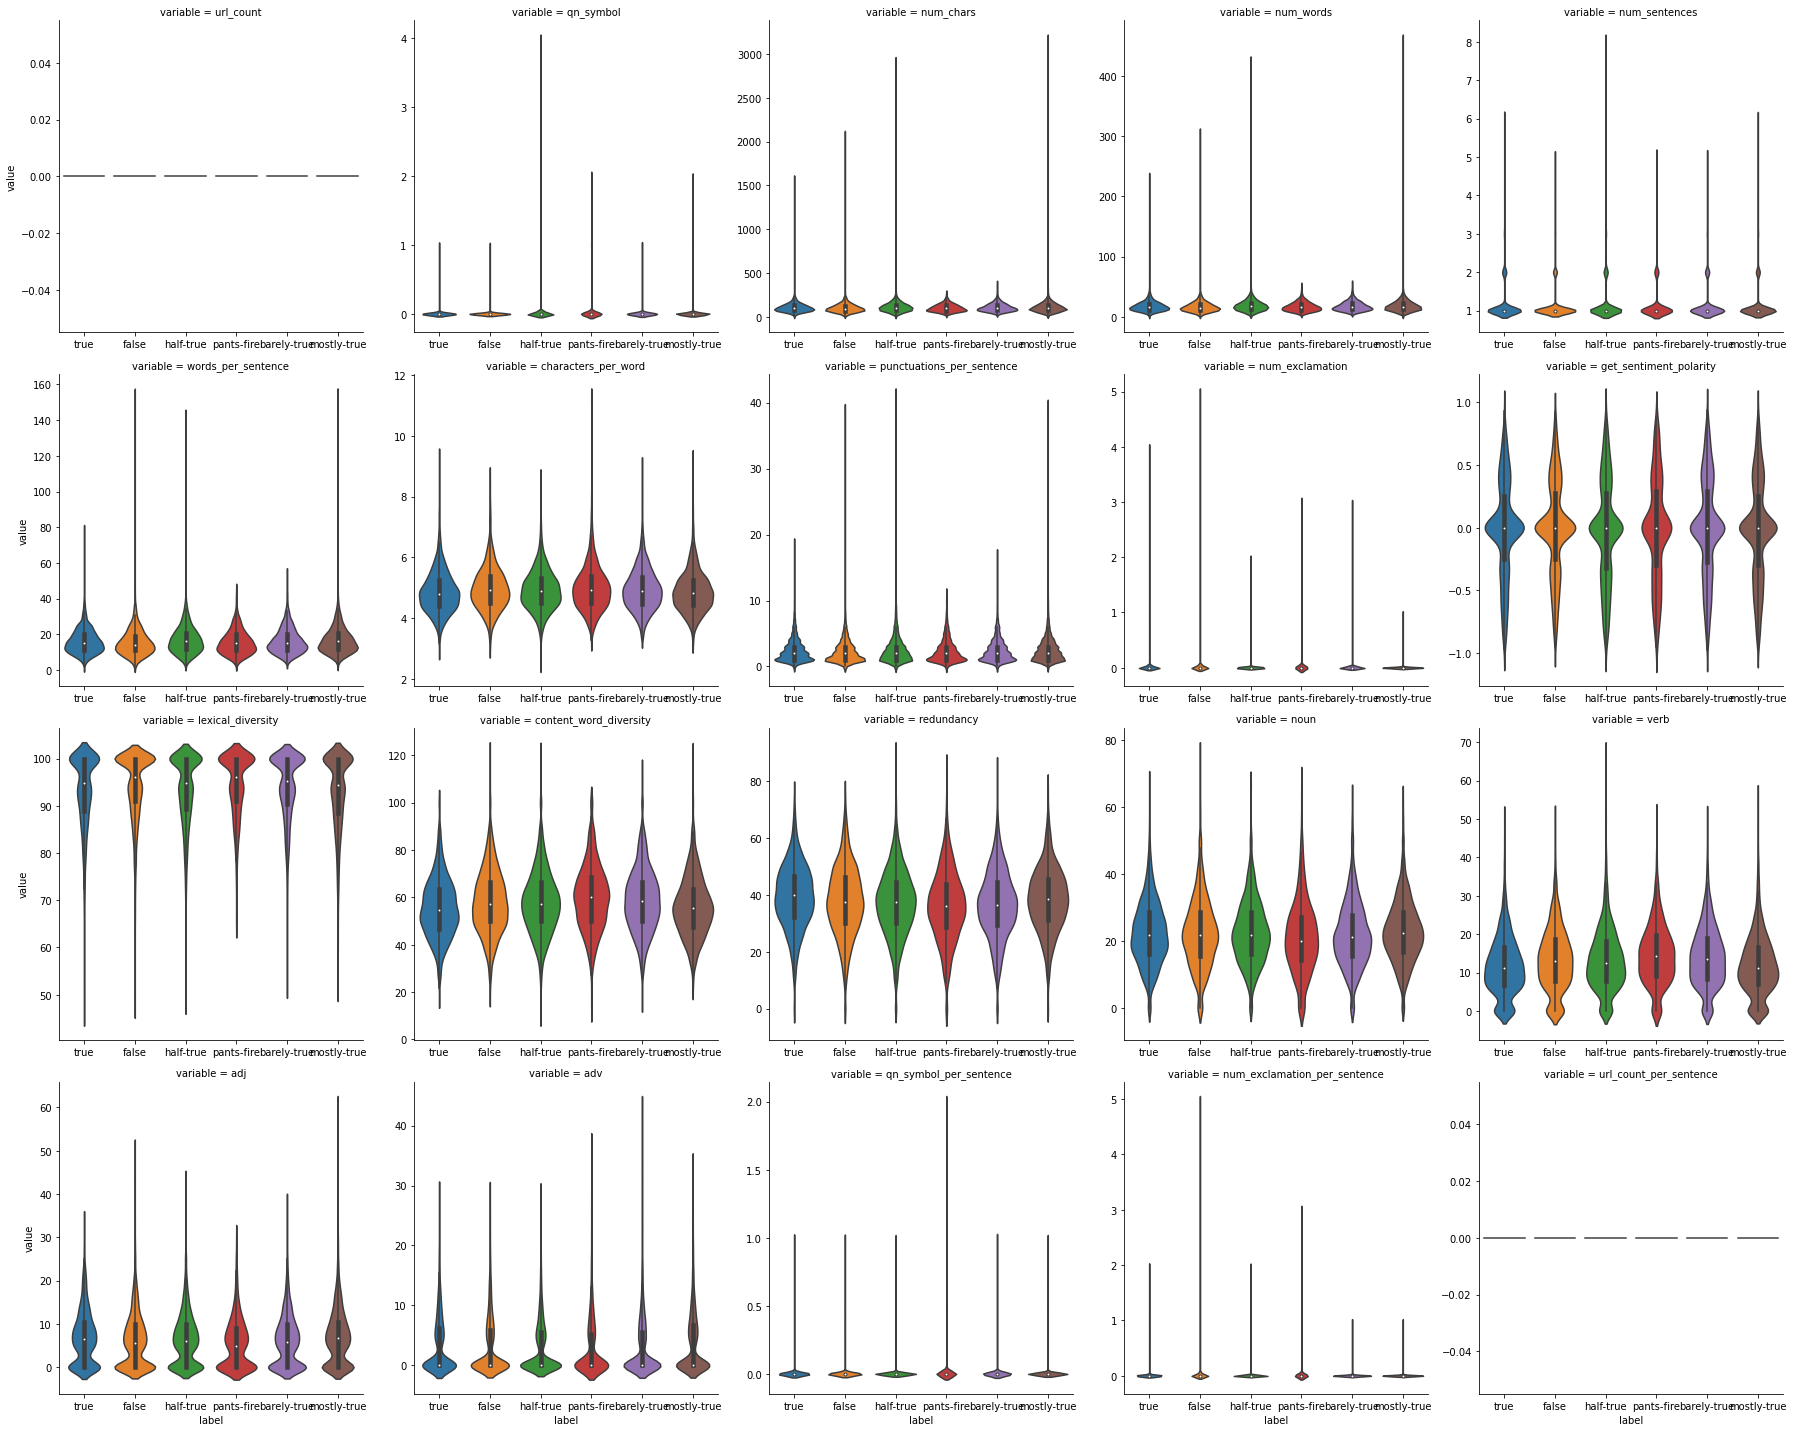

In [ ]:
f = pd.melt( df["liar"], id_vars='label', value_vars=sementic_features)

g = sns.catplot(x="label" ,y="value",
                col="variable",col_wrap=5,
                data=f, kind="violin",sharey=False,sharex=False);

## Liar 1:5

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


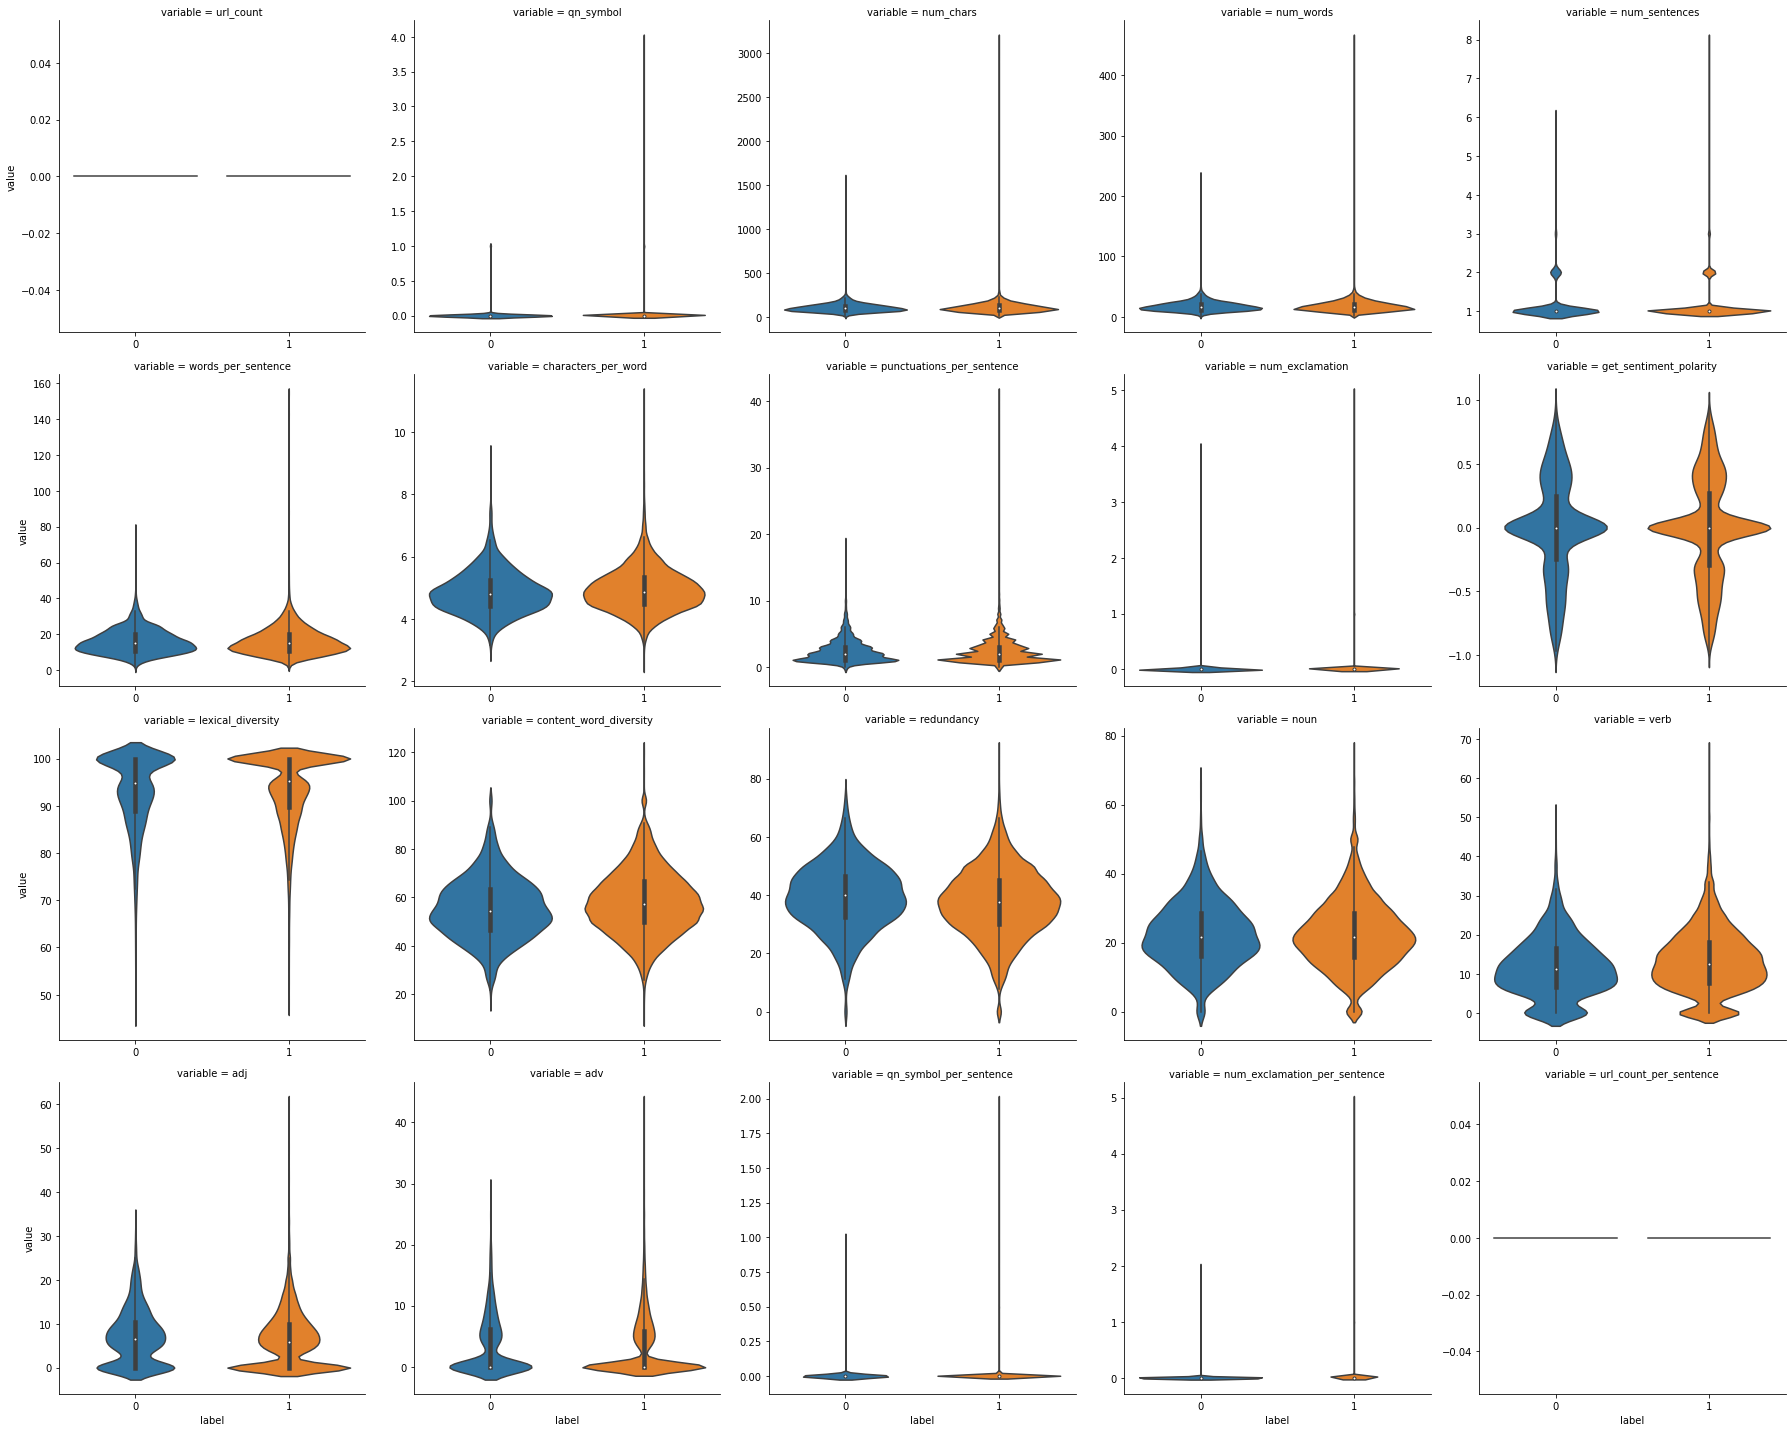

In [ ]:
f = pd.melt( dfl, id_vars='label', value_vars=sementic_features)

g = sns.catplot(x="label" ,y="value",
                col="variable",col_wrap=5,
                data=f, kind="violin",sharey=False,sharex=False);

## Welfake

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


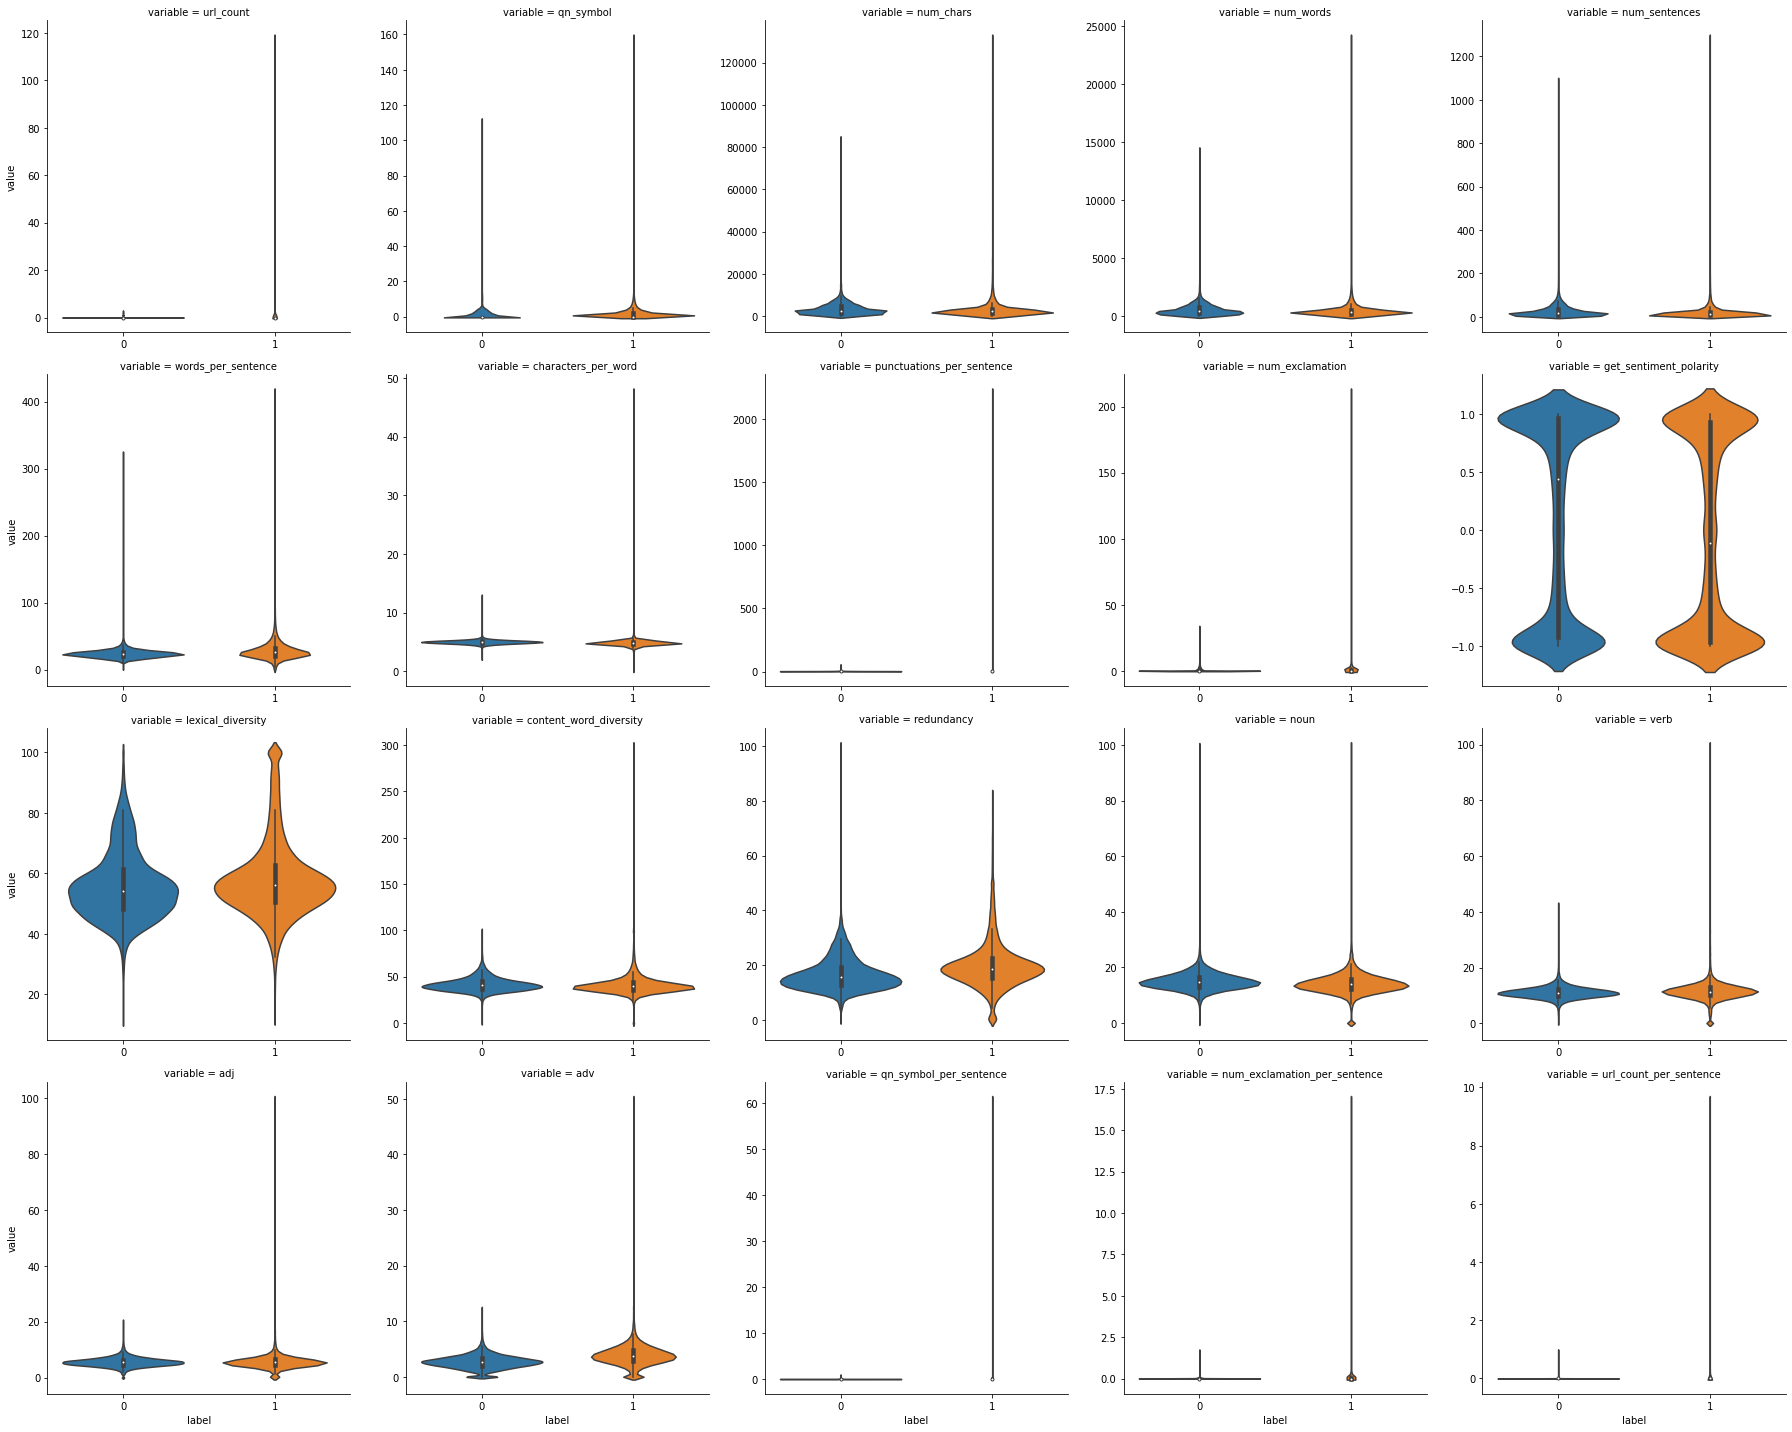

In [ ]:
f = pd.melt( df["welfake"], id_vars='label', value_vars=sementic_features)

g = sns.catplot(x="label" ,y="value",
                col="variable",col_wrap=5,
                data=f, kind="violin",sharey=False,sharex=False);

##  visualize

In [ ]:
# f = pd.melt( data[emot_null+["label"]], id_vars='label', value_vars=emot_null)

# g = sns.catplot(x="label" ,y="value",
#                 col="variable",col_wrap=5,
#                 data=f, kind="violin",sharey=False,sharex=False);

In [ ]:
df.keys()

dict_keys(['fakenewsnet', 'welfake', 'isot', 'liar'])

In [ ]:
# f = pd.melt(df, id_vars='label', value_vars=sementic)

# g = sns.catplot(x="label" , y="value",
#                 col="variable",col_wrap=5,
#                 data=f, kind="violin",sharey=False,sharex=False);

In [ ]:
data.loc[data['adj_adv_ratio'] >10].shape

In [ ]:
data=data.loc[data['qn_symbol'] <6]
data=data.loc[data['num_exclamation'] <5]
data=data.loc[data['adv'] <9]
data=data.loc[data['adj'] <16]
data=data.loc[data['verb'] <25]
data=data.loc[df['url_count'] <5]
data=data.loc[df['num_chars'] <6000]
data=data.loc[df['words_per_sentence'] <100]
data=data.loc[df['characters_per_word'] <6]
data=data.loc[df['punctuations_per_sentence'] <20]
data=data.loc[df['negative'] <10]
data=data.loc[df['positive'] <10]
data=data.loc[df['punctuations_per_sentence'] <10]
data=data.loc[data['adj_adv_ratio'] <10]
data=data.loc[data['verb_noun_ratio'] <3]

In [ ]:
f = pd.melt( data[sementic+["label"]], id_vars='label', value_vars=sementic)

g = sns.catplot(x="label" , y="value",
                col="variable",col_wrap=5,
                data=f, kind="violin",sharey=False,sharex=False);

In [ ]:
# for i in features:
#   sns.violinplot(data=data,y=i,x='label' ,orient='v' ,scale="count")
#   plt.show()

In [ ]:
X.hist(figsize=(20,20), xrot=-45 ,)

In [ ]:
import seaborn as sns
# mask out upper triangle
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), 
           cmap='RdBu_r', 
           annot = True, 
           mask = mask
            )

In [ ]:
f = pd.melt( data[sementic+["label"]], id_vars='label', value_vars=sementic)
g = sns.FacetGrid( f, hue='label', col="variable", col_wrap=5, sharex=False, sharey=False ,legend_out=True)
g = g.map( sns.histplot, "value").add_legend() #kde=True to trend line

# feature analysis

## feature analysis fakenewsnet

In [ ]:
# len(df["fakenewsnet"]['text'])-len(df["fakenewsnet"]['text'].drop_duplicates())

In [ ]:
X=df["fakenewsnet"][sementic_features]
Y=df["fakenewsnet"].label

In [ ]:
Y.value_counts()

0    16402
1     5322
Name: label, dtype: int64

In [ ]:
Y.replace(to_replace={"Real":0,"Fake":1},inplace=True)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.3, random_state=142,stratify=Y)

In [ ]:
X.head()

url_count  qn_symbol  ...  num_exclamation_per_sentence  url_count_per_sentence
0          0          1  ...                           0.0                     0.0
1          0          0  ...                           0.0                     0.0
2          0          0  ...                           0.0                     0.0
3          0          0  ...                           0.0                     0.0
4          0          0  ...                           0.0                     0.0

[5 rows x 20 columns]

In [ ]:
# Feature ranking with recursive feature elimination and cross-validated selection of the best number of features

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

Optimal number of features : 17


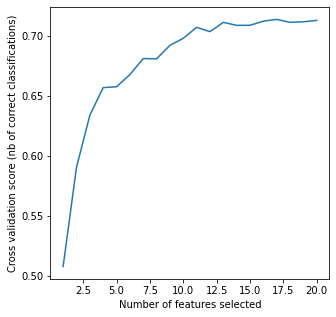

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100,max_features='auto',random_state=0,max_depth=14,class_weight='balanced')
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(),scoring='accuracy')
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

plt.figure(figsize=(5,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
rfecv.grid_scores_

array([0.50775816, 0.59029345, 0.63376277, 0.65678035, 0.65750338,
       0.66763085, 0.68098079, 0.68078409, 0.69202988, 0.69788291,
       0.70702391, 0.70340711, 0.71116724, 0.70866819, 0.70873378,
       0.71215349, 0.71366587, 0.7111667 , 0.71162742, 0.71281158])

In [ ]:
rfecv.support_

array([False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False])

In [ ]:
rfecv.ranking_

array([3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4])

In [ ]:
print(X_train.columns.values[rfecv.support_])

['qn_symbol' 'num_chars' 'num_words' 'words_per_sentence'
 'characters_per_word' 'punctuations_per_sentence' 'num_exclamation'
 'get_sentiment_polarity' 'lexical_diversity' 'content_word_diversity'
 'redundancy' 'noun' 'verb' 'adj' 'adv' 'qn_symbol_per_sentence'
 'num_exclamation_per_sentence']


In [ ]:
rfecv.estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
rfecv_features=list(X_train.columns.values[rfecv.support_])

In [ ]:
rfecv_features

['qn_symbol',
 'num_chars',
 'num_words',
 'words_per_sentence',
 'characters_per_word',
 'punctuations_per_sentence',
 'num_exclamation',
 'get_sentiment_polarity',
 'lexical_diversity',
 'content_word_diversity',
 'redundancy',
 'noun',
 'verb',
 'adj',
 'adv',
 'qn_symbol_per_sentence',
 'num_exclamation_per_sentence']

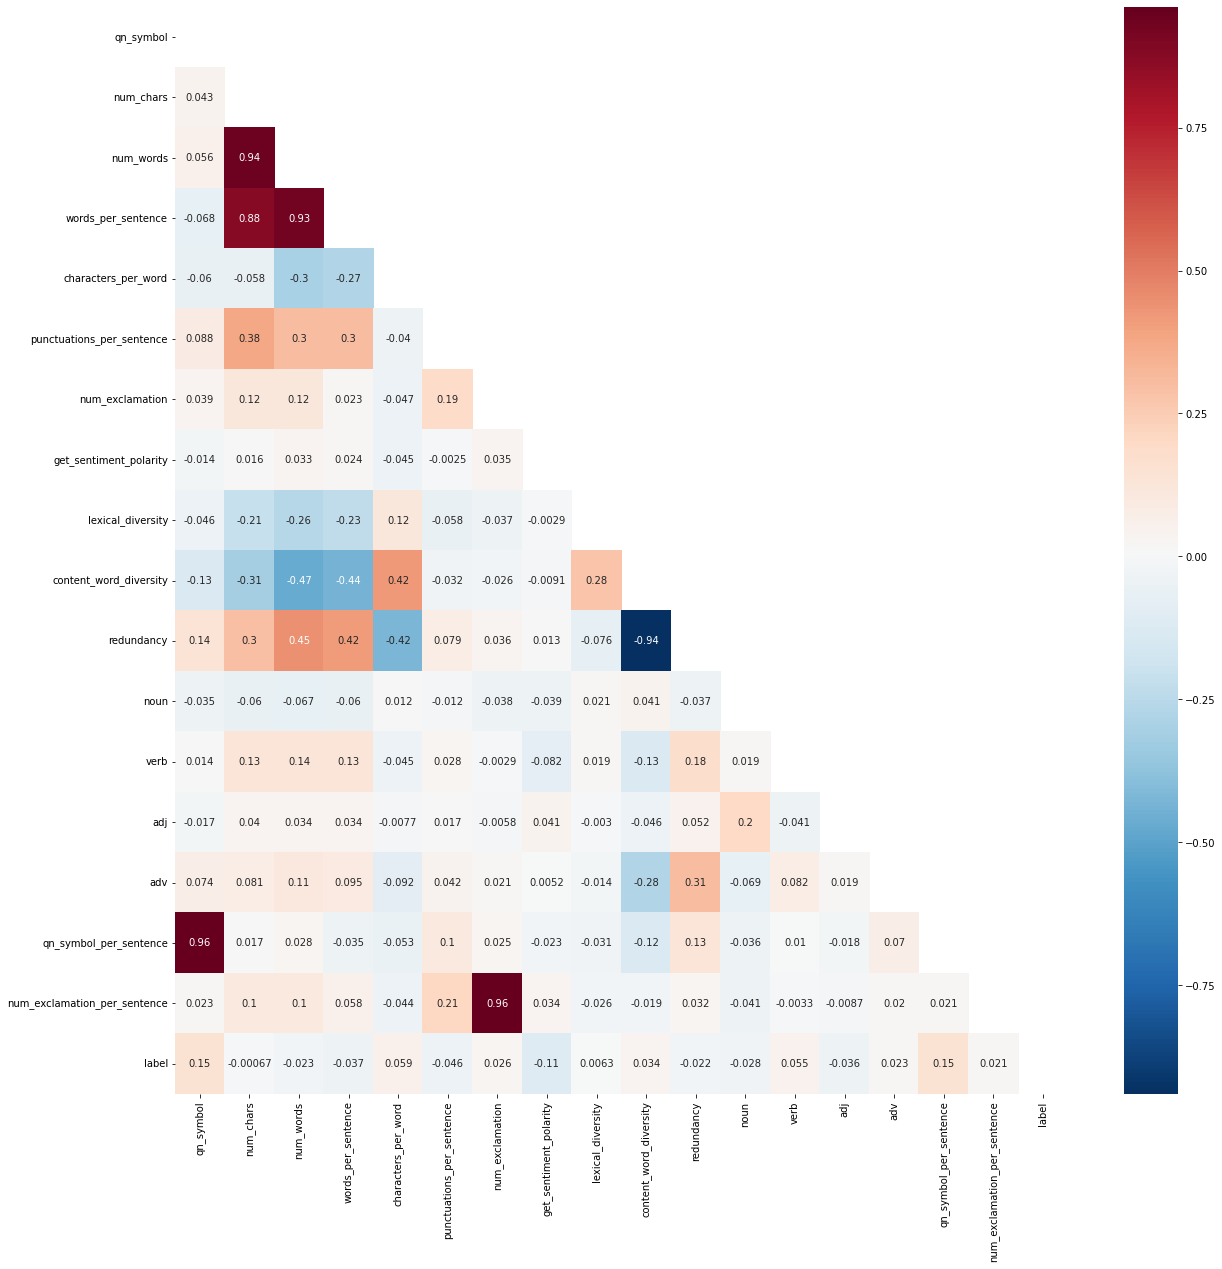

In [ ]:
# mask out upper triangle
mask = np.zeros_like(df["fakenewsnet"][rfecv_features+["label"]].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,20))
sns.heatmap(df["fakenewsnet"][rfecv_features+["label"]].corr(), 
           cmap='RdBu_r', 
           annot = True, 
           mask = mask
            )

In [ ]:
from sklearn import metrics
predicted_y = rfecv.predict(X_val)
gg=compute_metrics(predicted_y,y_val)
d=gg
tn, fp, fn, tp = d["confusiton_mat"].ravel()
print("{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}".format('prec-t','prec-f', 'rec-t','rec-f','f1-t','f1-f','accu','tn', 'fp', 'fn', 'tp'))  # correct
print ("{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:}\t{:}\t{:}\t{:}".format(d['precision'][0],d['precision'][1], d['recall'][0],d['recall'][1],d['f1'][0],d['f1'][1],d['accuracy'],tn, fp, fn, tp))

prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp
0.793	0.393	0.835	0.329	0.814	0.358	0.711	4111	810	1072	525


In [ ]:
rfecFakenewsnet=rfecv

In [ ]:
# prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp
# 0.804	0.408	0.807	0.403	0.805	0.405	0.707	4222	1010	1031	696

# prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp
# 0.788	0.367	0.840	0.291	0.813	0.325	0.707	4151	790	1118	459

# prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp
# 0.793	0.360	0.806	0.340	0.800	0.350	0.694	3984	956	1041	537

## feature analysis Codalab

In [ ]:
# len(df["liar"]['text'])-len(df["liar"]['text'].drop_duplicates())

In [ ]:
X=df["codalab"][sementic_features+["split"]].copy()
Y=df["codalab"].label.copy()

In [ ]:
df["codalab"].label.value_counts()

real    5599
fake    5100
Name: label, dtype: int64

In [ ]:
# X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.3, random_state=142,stratify=Y)

In [ ]:
X.split.value_counts()

train    6420
test     2140
val      2139
Name: split, dtype: int64

In [ ]:
train=df["codalab"].loc[df["codalab"]["split"]!="test"].replace(["fake"],1).replace(["real"],0)
test=df["codalab"].loc[df["codalab"]["split"]=="test"].replace(["fake"],1).replace(["real"],0)

In [ ]:
X_train = train[sementic_features]
X_val  = test[sementic_features]

y_train = train.label
y_val =   test.label

In [ ]:
X.head()

url_count  qn_symbol  ...  url_count_per_sentence  split
0          1          0  ...                0.333333   test
1          0          0  ...                0.000000   test
2          1          0  ...                1.000000   test
3          1          0  ...                0.333333   test
4          1          0  ...                1.000000   test

[5 rows x 21 columns]

In [ ]:
# Feature ranking with recursive feature elimination and cross-validated selection of the best number of features

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

Optimal number of features : 20


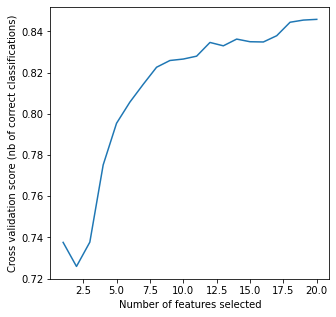

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100,max_features='auto',random_state=0,max_depth=14,class_weight='balanced')
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(),scoring='accuracy')
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

plt.figure(figsize=(5,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
rfecv.grid_scores_

array([0.73758739, 0.72590392, 0.73770374, 0.77520913, 0.79542112,
       0.80570306, 0.81434813, 0.82264334, 0.82591601, 0.8266166 ,
       0.82801847, 0.83467769, 0.83304129, 0.83631259, 0.83502707,
       0.83491017, 0.8379481 , 0.84449112, 0.84554265, 0.84589312])

In [ ]:
rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [ ]:
rfecv.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
print(X_train.columns.values[rfecv.support_])

['url_count' 'qn_symbol' 'num_chars' 'num_words' 'num_sentences'
 'words_per_sentence' 'characters_per_word' 'punctuations_per_sentence'
 'num_exclamation' 'get_sentiment_polarity' 'lexical_diversity'
 'content_word_diversity' 'redundancy' 'noun' 'verb' 'adj' 'adv'
 'qn_symbol_per_sentence' 'num_exclamation_per_sentence'
 'url_count_per_sentence']


In [ ]:
rfecv.estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
rfecv_features=list(X_train.columns.values[rfecv.support_])

In [ ]:
rfecv_features

['url_count',
 'qn_symbol',
 'num_chars',
 'num_words',
 'num_sentences',
 'words_per_sentence',
 'characters_per_word',
 'punctuations_per_sentence',
 'num_exclamation',
 'get_sentiment_polarity',
 'lexical_diversity',
 'content_word_diversity',
 'redundancy',
 'noun',
 'verb',
 'adj',
 'adv',
 'qn_symbol_per_sentence',
 'num_exclamation_per_sentence',
 'url_count_per_sentence']

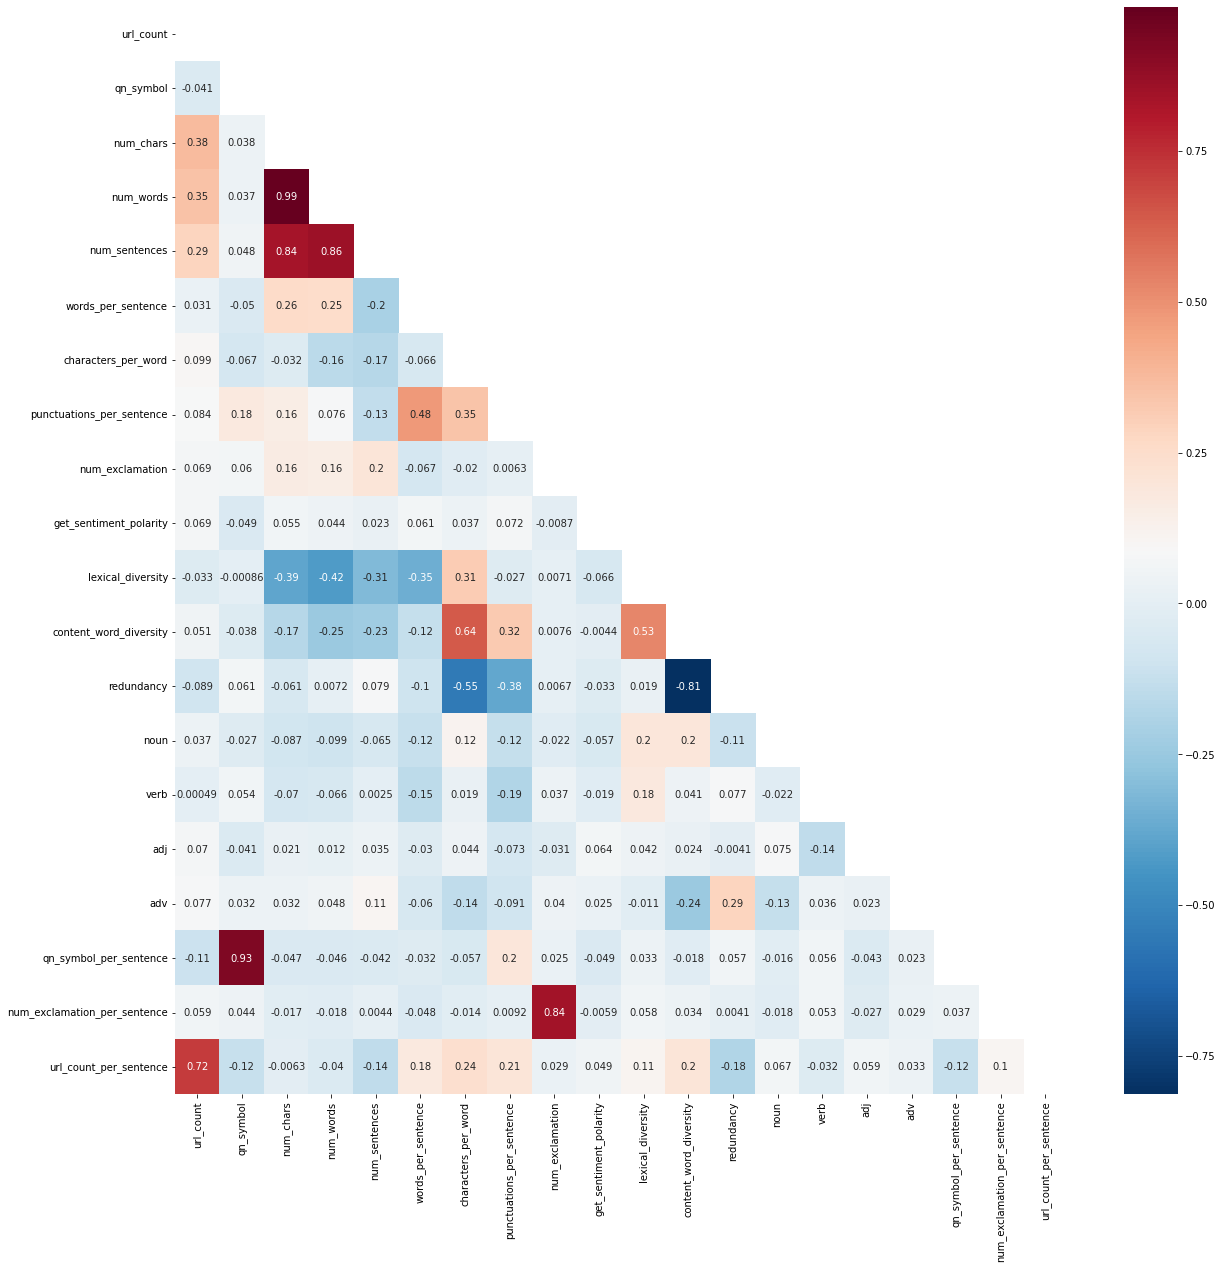

In [ ]:
# mask out upper triangle
mask = np.zeros_like(df["codalab"][rfecv_features+["label"]].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,20))
sns.heatmap(df["codalab"][rfecv_features+["label"]].corr(), 
           cmap='RdBu_r', 
           annot = True, 
           mask = mask
            )

In [ ]:
from sklearn import metrics
predicted_y = rfecv.predict(X_val)
gg=compute_metrics(predicted_y,y_val)
d=gg
tn, fp, fn, tp = d["confusiton_mat"].ravel()
# tn,fp,fn,tp=0,0,0,0
print("{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}".format('prec-t','prec-f', 'rec-t','rec-f','f1-t','f1-f','accu','tn', 'fp', 'fn', 'tp'))  # correct
print ("{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:}\t{:}\t{:}\t{:}".format(d['precision'][0],d['precision'][1], d['recall'][0],d['recall'][1],d['f1'][0],d['f1'][1],d['accuracy'],tn, fp, fn, tp))

prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp
0.821	0.880	0.903	0.784	0.860	0.829	0.846	1011	109	220	800


In [ ]:
# prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp
# 0.210	0.219	0.208	0.193	0.209	0.205	0.212	0	0	0	0    6 label

In [ ]:
codelabrfecv=rfecv

## feature analysis isot

In [ ]:
# len(df["isot"]['text'])-len(df["isot"]['text'].drop_duplicates())

0

In [ ]:
X=df["isot"][sementic_features]
Y=df["isot"].label

In [ ]:
Y.value_counts()

0    21192
1     1090
Name: label, dtype: int64

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.3, random_state=142,stratify=Y)

In [ ]:
X.head()

url_count  qn_symbol  ...  num_exclamation_per_sentence  url_count_per_sentence
0          0          0  ...                      0.000000                     0.0
1          0          0  ...                      0.000000                     0.0
2          0          0  ...                      0.000000                     0.0
3          0          0  ...                      0.000000                     0.0
4          0          1  ...                      0.025641                     0.0

[5 rows x 20 columns]

In [ ]:
# Feature ranking with recursive feature elimination and cross-validated selection of the best number of features

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

Optimal number of features : 15


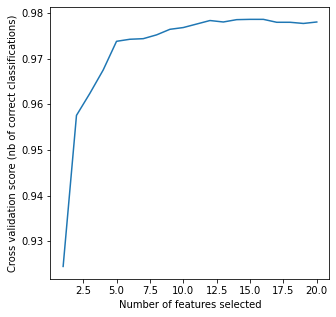

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100,max_features='auto',random_state=0,max_depth=14,class_weight='balanced')
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(),scoring='accuracy')
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

plt.figure(figsize=(5,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
rfecv.grid_scores_

array([0.92447271, 0.95755627, 0.96236464, 0.96749383, 0.97377702,
       0.97422588, 0.97435414, 0.97518764, 0.97640571, 0.97679051,
       0.97755981, 0.97832918, 0.97800853, 0.97852151, 0.97858563,
       0.97858561, 0.97794448, 0.97794455, 0.97768809, 0.97800857])

In [ ]:
rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False, False, False,  True,  True,
        True, False])

In [ ]:
rfecv.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 5, 2, 4, 1, 1, 1, 6])

In [ ]:
print(X_train.columns.values[rfecv.support_])

['url_count' 'qn_symbol' 'num_chars' 'num_words' 'num_sentences'
 'words_per_sentence' 'characters_per_word' 'punctuations_per_sentence'
 'num_exclamation' 'get_sentiment_polarity' 'lexical_diversity'
 'redundancy' 'adv' 'qn_symbol_per_sentence'
 'num_exclamation_per_sentence']


In [ ]:
rfecv.estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
rfecv_features=list(X_train.columns.values[rfecv.support_])

In [ ]:
rfecv_features

['url_count',
 'qn_symbol',
 'num_chars',
 'num_words',
 'num_sentences',
 'words_per_sentence',
 'characters_per_word',
 'punctuations_per_sentence',
 'num_exclamation',
 'get_sentiment_polarity',
 'lexical_diversity',
 'redundancy',
 'adv',
 'qn_symbol_per_sentence',
 'num_exclamation_per_sentence']

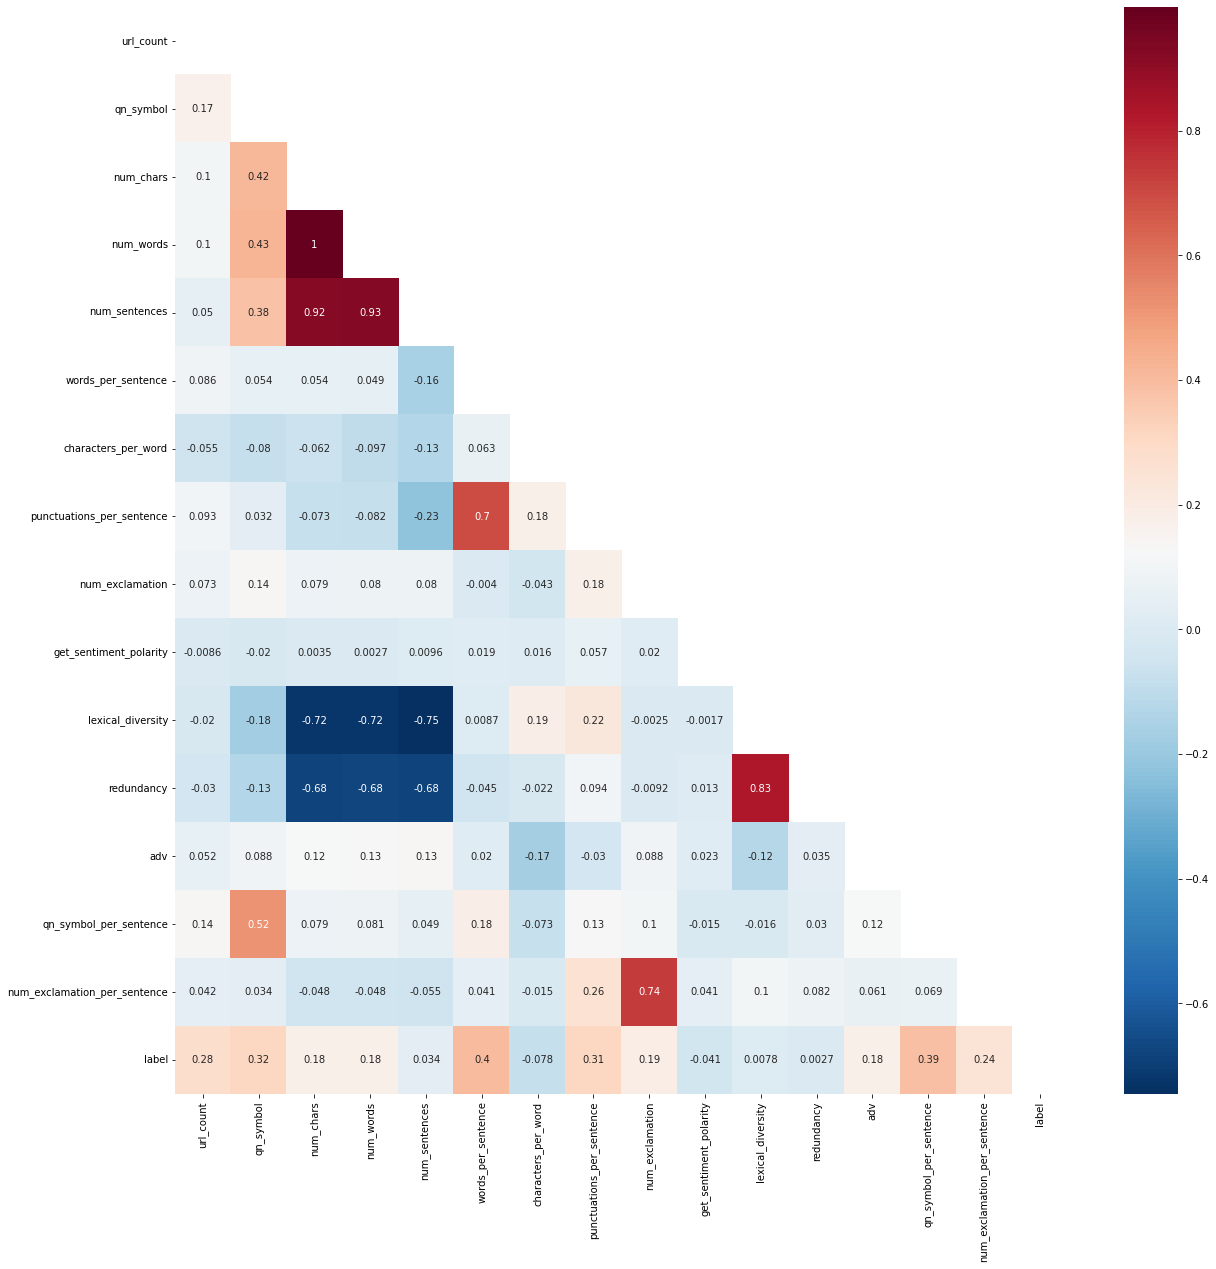

In [ ]:
# mask out upper triangle
mask = np.zeros_like(df["isot"][rfecv_features+["label"]].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,20))
sns.heatmap(df["isot"][rfecv_features+["label"]].corr(), 
           cmap='RdBu_r', 
           annot = True, 
           mask = mask
            )

In [ ]:
from sklearn import metrics
predicted_y = rfecv.predict(X_val)
gg=compute_metrics(predicted_y,y_val)
d=gg
tn, fp, fn, tp = d["confusiton_mat"].ravel()
print("{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}".format('prec-t','prec-f', 'rec-t','rec-f','f1-t','f1-f','accu','tn', 'fp', 'fn', 'tp'))  # correct
print ("{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:}\t{:}\t{:}\t{:}".format(d['precision'][0],d['precision'][1], d['recall'][0],d['recall'][1],d['f1'][0],d['f1'][1],d['accuracy'],tn, fp, fn, tp))

prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp
0.982	0.897	0.996	0.636	0.989	0.744	0.979	6334	24	119	208


In [ ]:
rfecisot=rfecv

In [ ]:
# prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp  (f1 )
# 0.936	0.920	0.926	0.931	0.931	0.925	0.928	6523	522	446	5979

# prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp (acc without removing counts)
# 0.923	0.926	0.909	0.938	0.916	0.932	0.925	4742	477	396	5957

# prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp(acc after remov acc)
# 0.918	0.925	0.908	0.934	0.913	0.929	0.922	4740	479	421	5932

## feature analysis kaggle

In [ ]:
# len(df["welfake"]['text'])-len(df["welfake"]['text'].drop_duplicates())

0

In [ ]:
X=df["kaggle"][sementic_features].copy()
Y=df["kaggle"].label.copy()

In [ ]:
df["kaggle"].label.value_counts()

T    21191
F    17455
Name: label, dtype: int64

In [ ]:
Y=Y.replace(to_replace={"T":0,"F":1})

In [ ]:
Y.value_counts()

0    21191
1    17455
Name: label, dtype: int64

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.3, random_state=142,stratify=Y)

In [ ]:
X.head()

url_count  qn_symbol  ...  num_exclamation_per_sentence  url_count_per_sentence
0          0          9  ...                      0.315789                0.000000
1          0          0  ...                      0.000000                0.000000
2          1          4  ...                      0.080000                0.040000
3          4          1  ...                      0.000000                0.307692
4          0          0  ...                      0.000000                0.000000

[5 rows x 20 columns]

In [ ]:
# Feature ranking with recursive feature elimination and cross-validated selection of the best number of features

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

Optimal number of features : 18


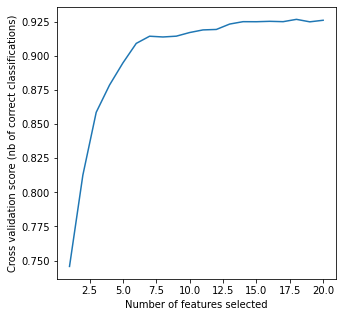

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100,max_features='auto',random_state=0,max_depth=14,class_weight='balanced')
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(),scoring='accuracy')
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

plt.figure(figsize=(5,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
rfecv.grid_scores_

array([0.74574888, 0.81258334, 0.85856882, 0.87856716, 0.89472121,
       0.90902708, 0.91427629, 0.91372176, 0.91431315, 0.91697477,
       0.91889702, 0.91922967, 0.92318495, 0.9249225 , 0.92488548,
       0.92518122, 0.92492247, 0.92662288, 0.92481151, 0.92595755])

In [ ]:
rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True])

In [ ]:
rfecv.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1])

In [ ]:
print(X_train.columns.values[rfecv.support_])

['url_count' 'qn_symbol' 'num_chars' 'num_words' 'num_sentences'
 'words_per_sentence' 'characters_per_word' 'punctuations_per_sentence'
 'num_exclamation' 'lexical_diversity' 'content_word_diversity'
 'redundancy' 'noun' 'verb' 'adv' 'qn_symbol_per_sentence'
 'num_exclamation_per_sentence' 'url_count_per_sentence']


In [ ]:
rfecv.estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
rfecv_features=list(X_train.columns.values[rfecv.support_])

In [ ]:
rfecv_features

['url_count',
 'qn_symbol',
 'num_chars',
 'num_words',
 'num_sentences',
 'words_per_sentence',
 'characters_per_word',
 'punctuations_per_sentence',
 'num_exclamation',
 'lexical_diversity',
 'content_word_diversity',
 'redundancy',
 'noun',
 'verb',
 'adv',
 'qn_symbol_per_sentence',
 'num_exclamation_per_sentence',
 'url_count_per_sentence']

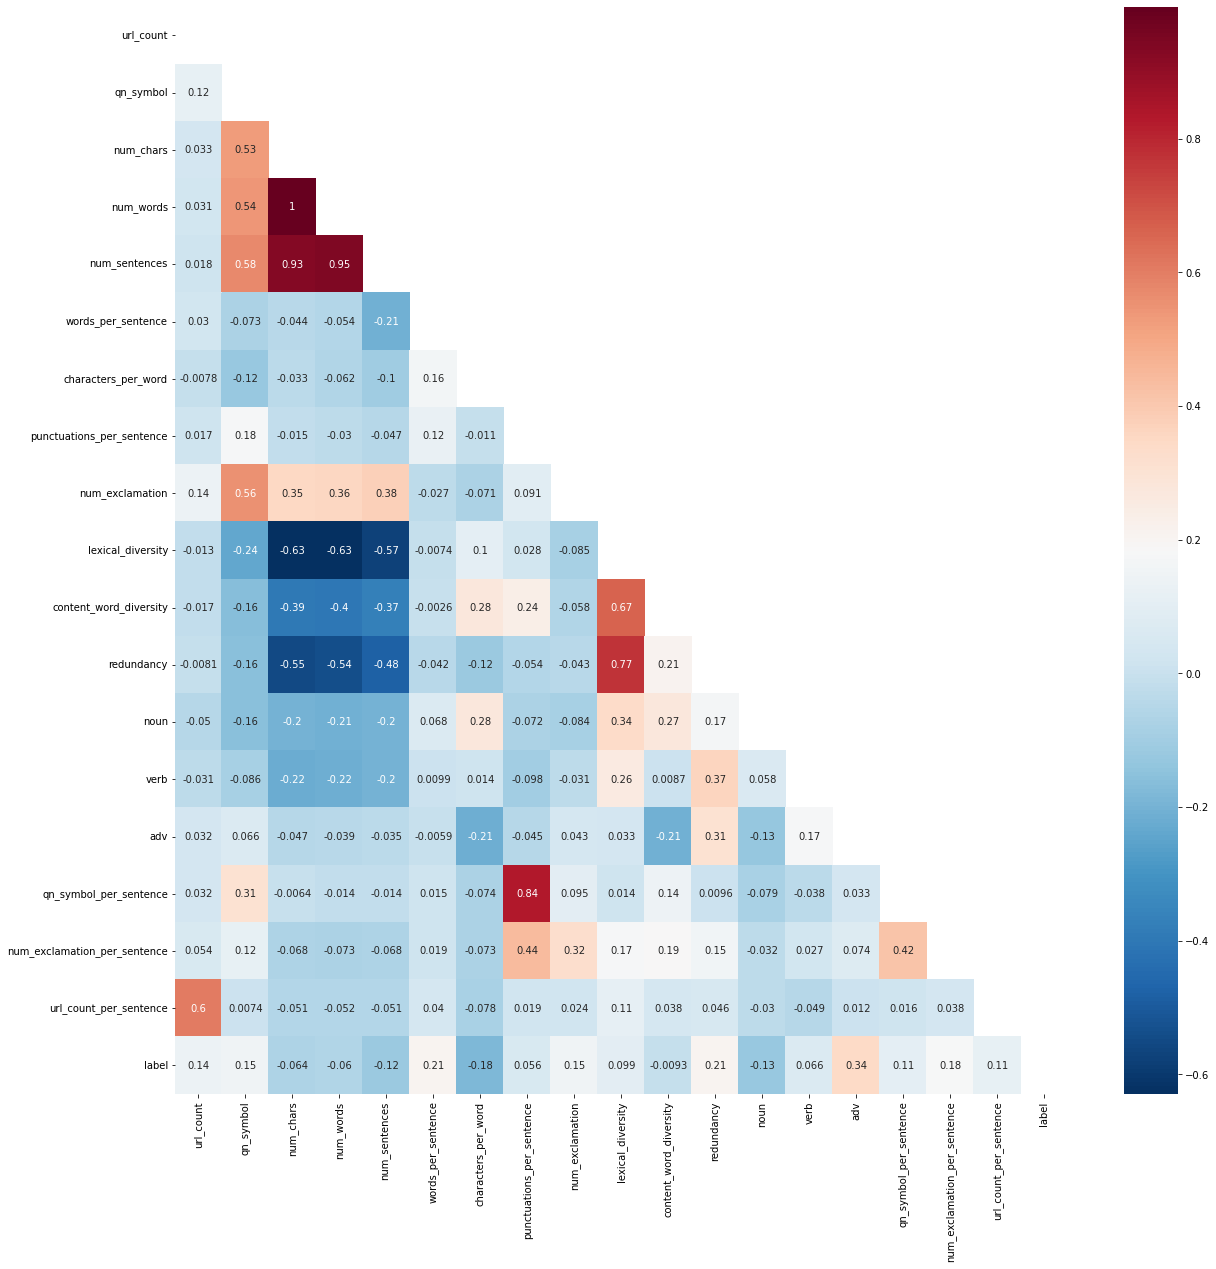

In [ ]:
# mask out upper triangle
mask = np.zeros_like(df["welfake"][rfecv_features+["label"]].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,20))
sns.heatmap(df["welfake"][rfecv_features+["label"]].corr(), 
           cmap='RdBu_r', 
           annot = True, 
           mask = mask
            )

In [ ]:
from sklearn import metrics
predicted_y = rfecv.predict(X_val)
gg=compute_metrics(predicted_y,y_val)
d=gg
tn, fp, fn, tp = d["confusiton_mat"].ravel()
print("{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}".format('prec-t','prec-f', 'rec-t','rec-f','f1-t','f1-f','accu','tn', 'fp', 'fn', 'tp'))  # correct
print ("{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:}\t{:}\t{:}\t{:}".format(d['precision'][0],d['precision'][1], d['recall'][0],d['recall'][1],d['f1'][0],d['f1'][1],d['accuracy'],tn, fp, fn, tp))

prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp
0.927	0.927	0.941	0.910	0.934	0.918	0.927	5979	378	472	4765


In [ ]:
kagglerfecv=rfecv

In [ ]:
# prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp
# 0.862	0.852	0.876	0.835	0.869	0.843	0.857	7724	1091	1236	6256


# prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp
# 0.859	0.855	0.881	0.830	0.870	0.842	0.857	7763	1052	1275	6217

# prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp
# 0.854	0.850	0.877	0.823	0.865	0.837	0.852	7730	1085	1324	6168

## feature analysis kagglerealfake

In [ ]:
# len(df["welfake"]['text'])-len(df["welfake"]['text'].drop_duplicates())

0

In [ ]:
X=df["kagglerealfake"][sementic_features]
Y=df["kagglerealfake"].label

In [ ]:
Y.value_counts()

1    3071
0    2989
Name: label, dtype: int64

In [ ]:
Y=Y.replace(to_replace={"REAL":0,"FAKE":1})

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.3, random_state=142,stratify=Y)

In [ ]:
X.head()

url_count  qn_symbol  ...  num_exclamation_per_sentence  url_count_per_sentence
0          0          3  ...                      0.000000                0.000000
1          1          0  ...                      0.000000                0.041667
2          0          0  ...                      0.000000                0.000000
3          1          0  ...                      0.058824                0.058824
4          0          0  ...                      0.125000                0.000000

[5 rows x 20 columns]

In [ ]:
# Feature ranking with recursive feature elimination and cross-validated selection of the best number of features

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

Optimal number of features : 17


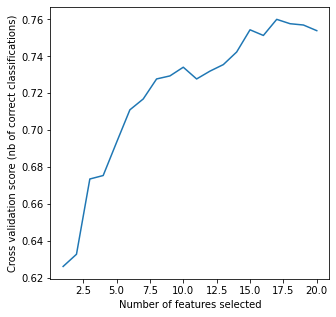

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100,max_features='auto',random_state=0,max_depth=14,class_weight='balanced')
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(),scoring='accuracy')
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

plt.figure(figsize=(5,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
rfecv.grid_scores_

array([0.62612285, 0.63272829, 0.67350907, 0.67539086, 0.69330844,
       0.71098934, 0.71687974, 0.72772463, 0.72937279, 0.73408561,
       0.72772185, 0.73196741, 0.73550264, 0.74233366, 0.75436112,
       0.75129981, 0.76002233, 0.75766051, 0.75695657, 0.75389443])

In [ ]:
rfecv.support_

array([ True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False])

In [ ]:
rfecv.ranking_

array([1, 2, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3])

In [ ]:
print(X_train.columns.values[rfecv.support_])

['url_count' 'num_chars' 'num_words' 'num_sentences' 'words_per_sentence'
 'characters_per_word' 'punctuations_per_sentence'
 'get_sentiment_polarity' 'lexical_diversity' 'content_word_diversity'
 'redundancy' 'noun' 'verb' 'adj' 'adv' 'qn_symbol_per_sentence'
 'num_exclamation_per_sentence']


In [ ]:
rfecv.estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
rfecv_features=list(X_train.columns.values[rfecv.support_])

In [ ]:
rfecv_features

['url_count',
 'num_chars',
 'num_words',
 'num_sentences',
 'words_per_sentence',
 'characters_per_word',
 'punctuations_per_sentence',
 'get_sentiment_polarity',
 'lexical_diversity',
 'content_word_diversity',
 'redundancy',
 'noun',
 'verb',
 'adj',
 'adv',
 'qn_symbol_per_sentence',
 'num_exclamation_per_sentence']

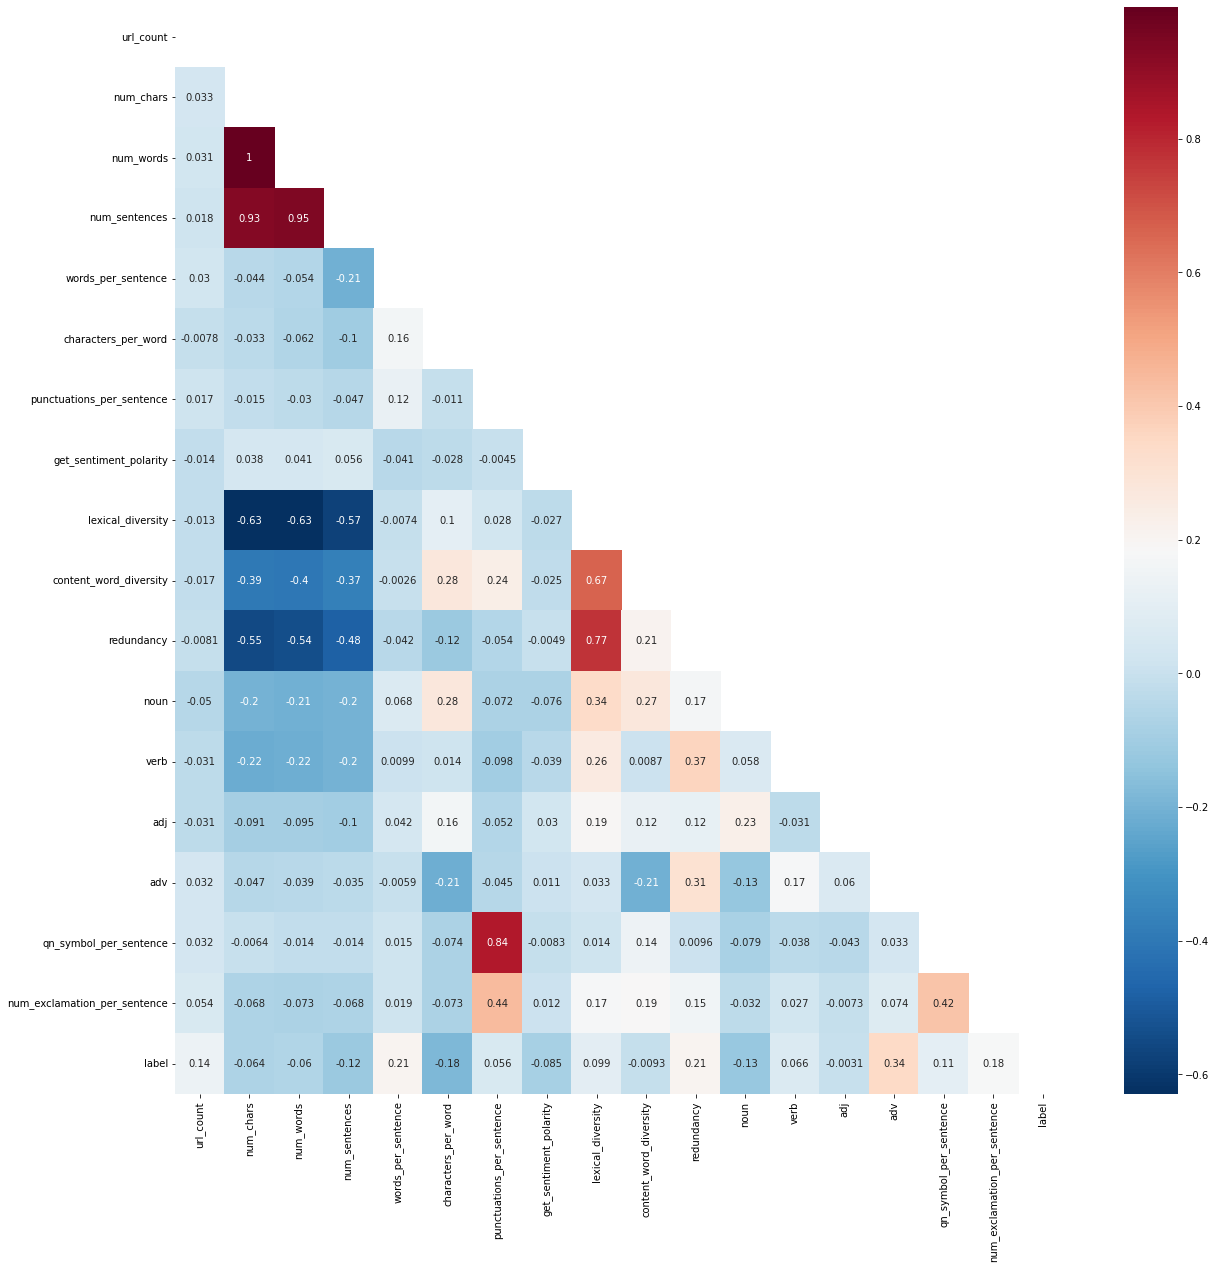

In [ ]:
# mask out upper triangle
mask = np.zeros_like(df["welfake"][rfecv_features+["label"]].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,20))
sns.heatmap(df["welfake"][rfecv_features+["label"]].corr(), 
           cmap='RdBu_r', 
           annot = True, 
           mask = mask
            )

In [ ]:
from sklearn import metrics
predicted_y = rfecv.predict(X_val)
gg=compute_metrics(predicted_y,y_val)
d=gg
tn, fp, fn, tp = d["confusiton_mat"].ravel()
print("{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}".format('prec-t','prec-f', 'rec-t','rec-f','f1-t','f1-f','accu','tn', 'fp', 'fn', 'tp'))  # correct
print ("{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:}\t{:}\t{:}\t{:}".format(d['precision'][0],d['precision'][1], d['recall'][0],d['recall'][1],d['f1'][0],d['f1'][1],d['accuracy'],tn, fp, fn, tp))

prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp
0.767	0.781	0.778	0.770	0.773	0.775	0.774	698	199	212	709


In [ ]:
kagglerealfakerfecv=rfecv

In [ ]:
# prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp
# 0.862	0.852	0.876	0.835	0.869	0.843	0.857	7724	1091	1236	6256


# prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp
# 0.859	0.855	0.881	0.830	0.870	0.842	0.857	7763	1052	1275	6217

# prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp
# 0.854	0.850	0.877	0.823	0.865	0.837	0.852	7730	1085	1324	6168

## feature analysis liar  6label

In [ ]:
# len(df["liar"]['text'])-len(df["liar"]['text'].drop_duplicates())

In [ ]:
X=df["liar"][sementic_features+["split"]]
Y=df["liar"].label

In [ ]:
df["liar"].label.value_counts()

In [ ]:
# X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.3, random_state=142,stratify=Y)

In [ ]:
X.split.value_counts()

train    10219
valid     1279
test      1267
Name: split, dtype: int64

In [ ]:
train=df["liar"].loc[df["liar"]["split"]!="test"]
test=df["liar"].loc[df["liar"]["split"]=="test"]

In [ ]:
X_train = train[sementic_features]
X_val  = test[sementic_features]

y_train = train.label
y_val =   test.label

In [ ]:
X.head()

url_count  qn_symbol  ...  url_count_per_sentence  split
0          0          0  ...                     0.0   test
1          0          0  ...                     0.0   test
2          0          0  ...                     0.0   test
3          0          0  ...                     0.0   test
4          0          0  ...                     0.0   test

[5 rows x 21 columns]

In [ ]:
# Feature ranking with recursive feature elimination and cross-validated selection of the best number of features

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

Optimal number of features : 13


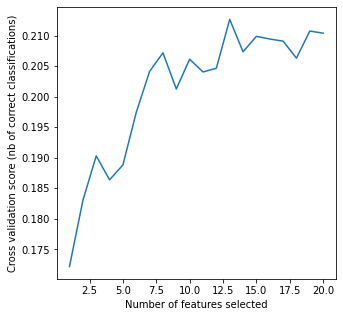

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100,max_features='auto',random_state=0,max_depth=14,class_weight='balanced')
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(),scoring='accuracy')
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

plt.figure(figsize=(5,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
rfecv.grid_scores_

array([0.17220391, 0.18298909, 0.19029449, 0.18638175, 0.18881661,
       0.19742591, 0.20412289, 0.20716648, 0.20125242, 0.20612274,
       0.20403597, 0.20464455, 0.21264572, 0.20734024, 0.20986361,
       0.20942667, 0.20908164, 0.2062965 , 0.21073181, 0.21038429])

In [ ]:
rfecv.support_

array([False, False,  True,  True, False,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False])

In [ ]:
rfecv.ranking_

array([8, 6, 1, 1, 2, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 3, 5, 7])

In [ ]:
print(X_train.columns.values[rfecv.support_])

['num_chars' 'num_words' 'words_per_sentence' 'characters_per_word'
 'punctuations_per_sentence' 'get_sentiment_polarity' 'lexical_diversity'
 'content_word_diversity' 'redundancy' 'noun' 'verb' 'adj' 'adv']


In [ ]:
rfecv.estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
rfecv_features=list(X_train.columns.values[rfecv.support_])

In [ ]:
rfecv_features

['num_chars',
 'num_words',
 'words_per_sentence',
 'characters_per_word',
 'punctuations_per_sentence',
 'get_sentiment_polarity',
 'lexical_diversity',
 'content_word_diversity',
 'redundancy',
 'noun',
 'verb',
 'adj',
 'adv']

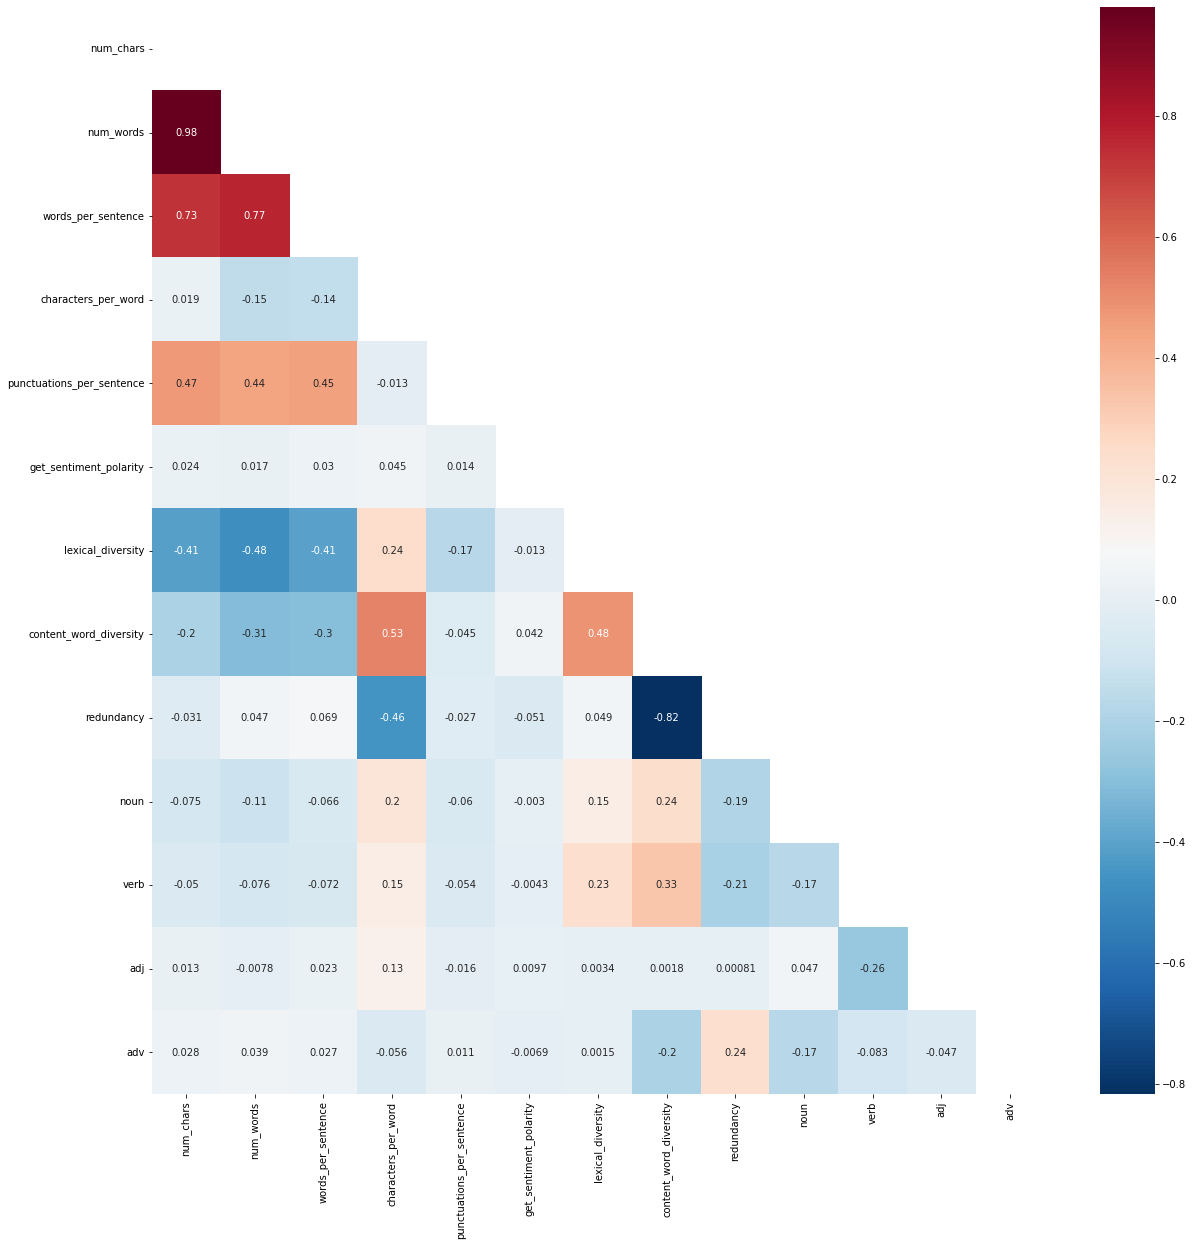

In [ ]:
# mask out upper triangle
mask = np.zeros_like(df["liar"][rfecv_features+["label"]].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,20))
sns.heatmap(df["liar"][rfecv_features+["label"]].corr(), 
           cmap='RdBu_r', 
           annot = True, 
           mask = mask
            )

In [ ]:
from sklearn import metrics
predicted_y = rfecv.predict(X_val)
gg=compute_metrics(predicted_y,y_val)
d=gg
# tn, fp, fn, tp = d["confusiton_mat"].ravel()
tn,fp,fn,tp=0,0,0,0
print("{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}".format('prec-t','prec-f', 'rec-t','rec-f','f1-t','f1-f','accu','tn', 'fp', 'fn', 'tp'))  # correct
print ("{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:}\t{:}\t{:}\t{:}".format(d['precision'][0],d['precision'][1], d['recall'][0],d['recall'][1],d['f1'][0],d['f1'][1],d['accuracy'],tn, fp, fn, tp))

prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp
0.210	0.219	0.208	0.193	0.209	0.205	0.212	0	0	0	0


In [ ]:
# prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp
# 0.210	0.219	0.208	0.193	0.209	0.205	0.212	0	0	0	0    6 label

In [ ]:
liar6rfecv=rfecv

## feature analysis liar 2:4

In [ ]:
# len(df["liar"]['text'])-len(df["liar"]['text'].drop_duplicates())

0

In [ ]:
dfl24=df["liar"][sementic_features+["split","label"]].copy()

In [ ]:
dfl24.split.value_counts()

train    10219
valid     1279
test      1267
Name: split, dtype: int64

In [ ]:
df["liar"].label.value_counts()

half-true      2621
false          2493
mostly-true    2452
barely-true    2102
true           2050
pants-fire     1047
Name: label, dtype: int64

In [ ]:
dfl24.label.value_counts()

1    8263
0    4502
Name: label, dtype: int64

In [ ]:
dfl24["label"]=dfl24["label"].replace(["half-true","false","barely-true","pants-fire"],1).replace(["true","mostly-true"],0)

In [ ]:
train=dfl24.loc[dfl24["split"]!="test"]
test=dfl24.loc[dfl24["split"]=="test"]

In [ ]:
X_train = train[sementic_features]
X_val  = test[sementic_features]

y_train = train.label
y_val =   test.label

In [ ]:
X.head()

url_count  qn_symbol  ...  num_exclamation_per_sentence  url_count_per_sentence
0          0          9  ...                      0.315789                0.000000
1          0          0  ...                      0.000000                0.000000
2          1          4  ...                      0.080000                0.040000
3          4          1  ...                      0.000000                0.307692
4          0          0  ...                      0.000000                0.000000

[5 rows x 20 columns]

In [ ]:
# Feature ranking with recursive feature elimination and cross-validated selection of the best number of features

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

Optimal number of features : 16


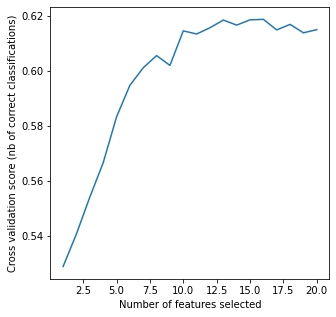

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100,max_features='auto',random_state=0,max_depth=14,class_weight='balanced')
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(),scoring='accuracy')
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

plt.figure(figsize=(5,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
rfecv.grid_scores_

array([0.52904654, 0.54087618, 0.5541831 , 0.56662038, 0.58323176,
       0.5947118 , 0.60106167, 0.60549615, 0.60193101, 0.61445351,
       0.61332273, 0.61558436, 0.61836825, 0.61654179, 0.61845513,
       0.61862886, 0.61480186, 0.616803  , 0.61375755, 0.61488886])

In [ ]:
rfecv.support_

array([False, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False])

In [ ]:
rfecv.ranking_

array([5, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4])

In [ ]:
print(X_train.columns.values[rfecv.support_])

['num_chars' 'num_words' 'num_sentences' 'words_per_sentence'
 'characters_per_word' 'punctuations_per_sentence'
 'get_sentiment_polarity' 'lexical_diversity' 'content_word_diversity'
 'redundancy' 'noun' 'verb' 'adj' 'adv' 'qn_symbol_per_sentence'
 'num_exclamation_per_sentence']


In [ ]:
rfecv.estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
rfecv_features=list(X_train.columns.values[rfecv.support_])

In [ ]:
rfecv_features

['num_chars',
 'num_words',
 'num_sentences',
 'words_per_sentence',
 'characters_per_word',
 'punctuations_per_sentence',
 'get_sentiment_polarity',
 'lexical_diversity',
 'content_word_diversity',
 'redundancy',
 'noun',
 'verb',
 'adj',
 'adv',
 'qn_symbol_per_sentence',
 'num_exclamation_per_sentence']

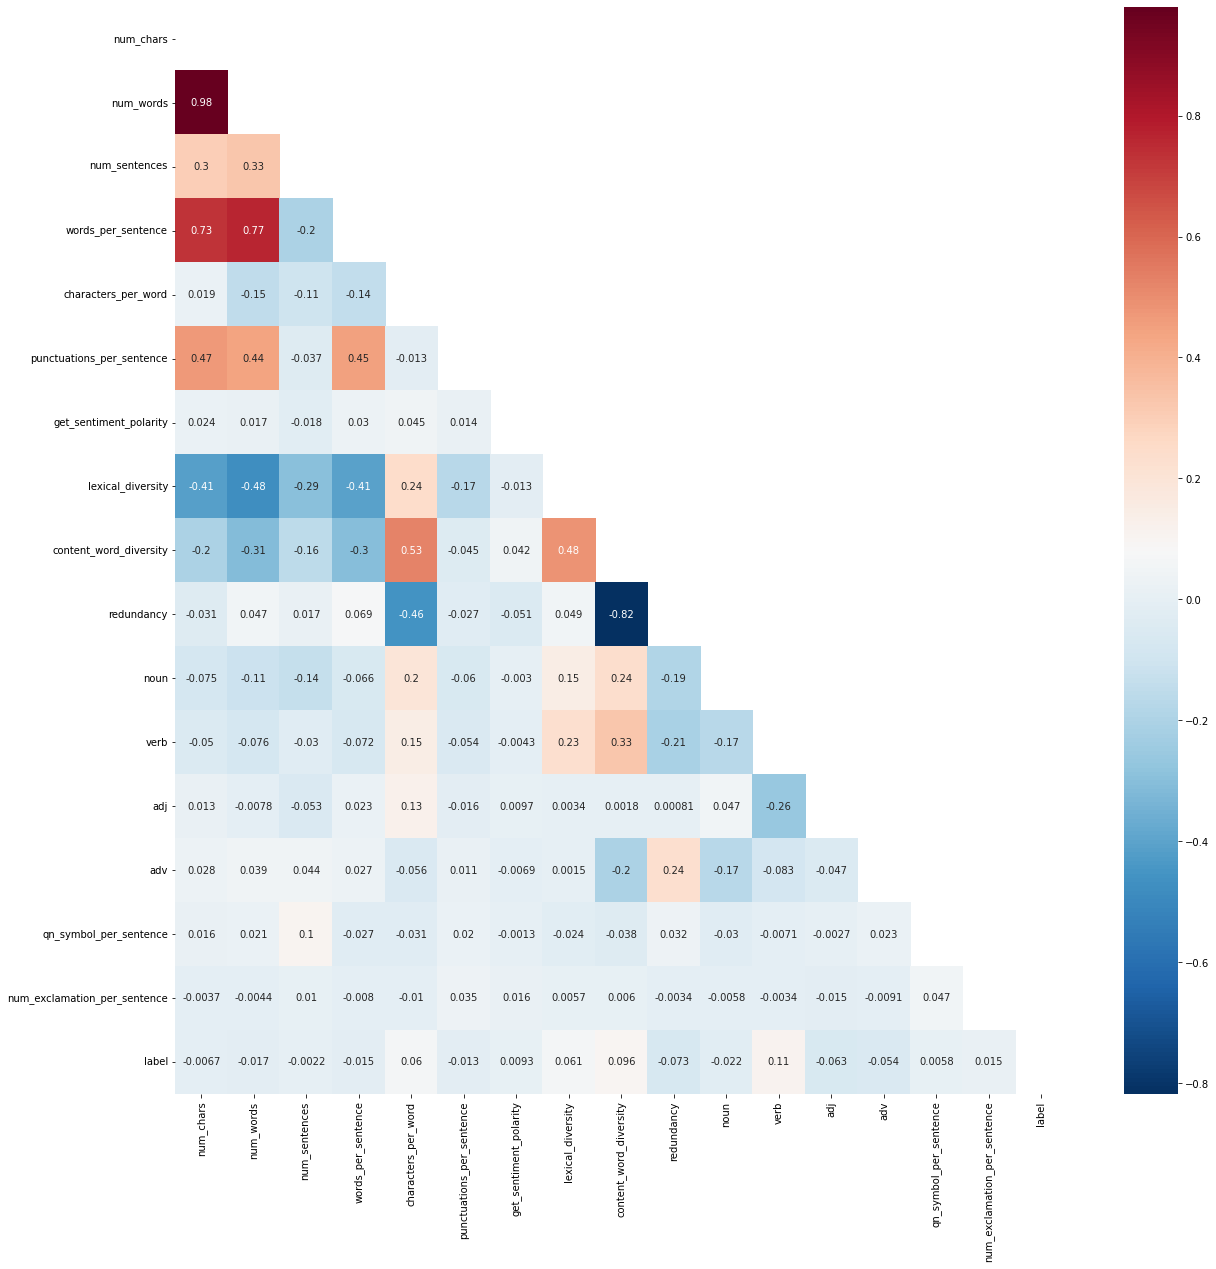

In [ ]:
# mask out upper triangle
mask = np.zeros_like(dfl24[rfecv_features+["label"]].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,20))
sns.heatmap(dfl24[rfecv_features+["label"]].corr(), 
           cmap='RdBu_r', 
           annot = True, 
           mask = mask
            )

In [ ]:
from sklearn import metrics
predicted_y = rfecv.predict(X_val)
gg=compute_metrics(predicted_y,y_val)
d=gg
tn, fp, fn, tp = d["confusiton_mat"].ravel()
# tn,fp,fn,tp=0,0,0,0
print("{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}".format('prec-t','prec-f', 'rec-t','rec-f','f1-t','f1-f','accu','tn', 'fp', 'fn', 'tp'))  # correct
print ("{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:}\t{:}\t{:}\t{:}".format(d['precision'][0],d['precision'][1], d['recall'][0],d['recall'][1],d['f1'][0],d['f1'][1],d['accuracy'],tn, fp, fn, tp))

prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp
0.476	0.689	0.352	0.787	0.405	0.735	0.633	158	291	174	644


In [ ]:
liar24rfecv=rfecv

In [ ]:
# prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp
# 0.936	0.920	0.926	0.931	0.931	0.925	0.928	6523	522	446	5979  f1

# prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp
# 0.446	0.678	0.315	0.787	0.369	0.729	0.621	425	926	527	1952   with count

# prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp
# 0.443	0.677	0.315	0.784	0.368	0.727	0.619	425	926	535	1944  without count 

# prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp
# 0.476	0.689	0.352	0.787	0.405	0.735	0.633	158	291	174	644    with count

## feature analysis liar 1:5

In [ ]:
# len(df["liar"]['text'])-len(df["liar"]['text'].drop_duplicates())

0

In [ ]:
dfl=df["liar"][sementic_features+["split","label"]].copy()

In [ ]:
dfl.split.value_counts()

train    10219
valid     1279
test      1267
Name: split, dtype: int64

In [ ]:
dfl.label.value_counts()

1    10715
0     2050
Name: label, dtype: int64

In [ ]:
dfl["label"]=dfl["label"].replace(["half-true","false","barely-true","pants-fire","mostly-true"],1).replace(["true"],0)

In [ ]:
train=dfl.loc[dfl["split"]!="test"]
test=dfl.loc[dfl["split"]=="test"]

In [ ]:
X_train = train[sementic_features]
X_val  = test[sementic_features]

y_train = train.label
y_val =   test.label

In [ ]:
X_train.head()

url_count  ...  url_count_per_sentence
1267          0  ...                     0.0
1268          0  ...                     0.0
1269          0  ...                     0.0
1270          0  ...                     0.0
1271          0  ...                     0.0

[5 rows x 20 columns]

In [ ]:
# Feature ranking with recursive feature elimination and cross-validated selection of the best number of features

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

Optimal number of features : 13


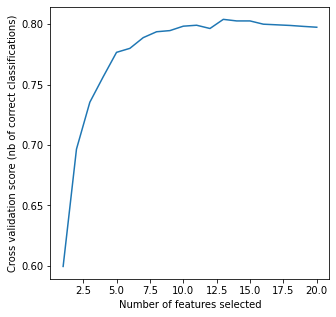

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100,max_features='auto',random_state=0,max_depth=14,class_weight='balanced')
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(),scoring='accuracy')
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

plt.figure(figsize=(5,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
rfecv.grid_scores_

array([0.59941014, 0.69655559, 0.73534675, 0.75639431, 0.7766587 ,
       0.77996305, 0.78883325, 0.79370176, 0.79465998, 0.79831276,
       0.79909575, 0.79639968, 0.80396653, 0.80266108, 0.80266184,
       0.7999646 , 0.7994438 , 0.79892157, 0.79813862, 0.79744278])

In [ ]:
rfecv.support_

array([False, False,  True,  True, False,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False])

In [ ]:
rfecv.ranking_

array([8, 5, 1, 1, 2, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 3, 6, 7])

In [ ]:
print(X_train.columns.values[rfecv.support_])

['num_chars' 'num_words' 'words_per_sentence' 'characters_per_word'
 'punctuations_per_sentence' 'get_sentiment_polarity' 'lexical_diversity'
 'content_word_diversity' 'redundancy' 'noun' 'verb' 'adj' 'adv']


In [ ]:
rfecv.estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
rfecv_features=list(X_train.columns.values[rfecv.support_])

In [ ]:
rfecv_features

['num_chars',
 'num_words',
 'words_per_sentence',
 'characters_per_word',
 'punctuations_per_sentence',
 'get_sentiment_polarity',
 'lexical_diversity',
 'content_word_diversity',
 'redundancy',
 'noun',
 'verb',
 'adj',
 'adv']

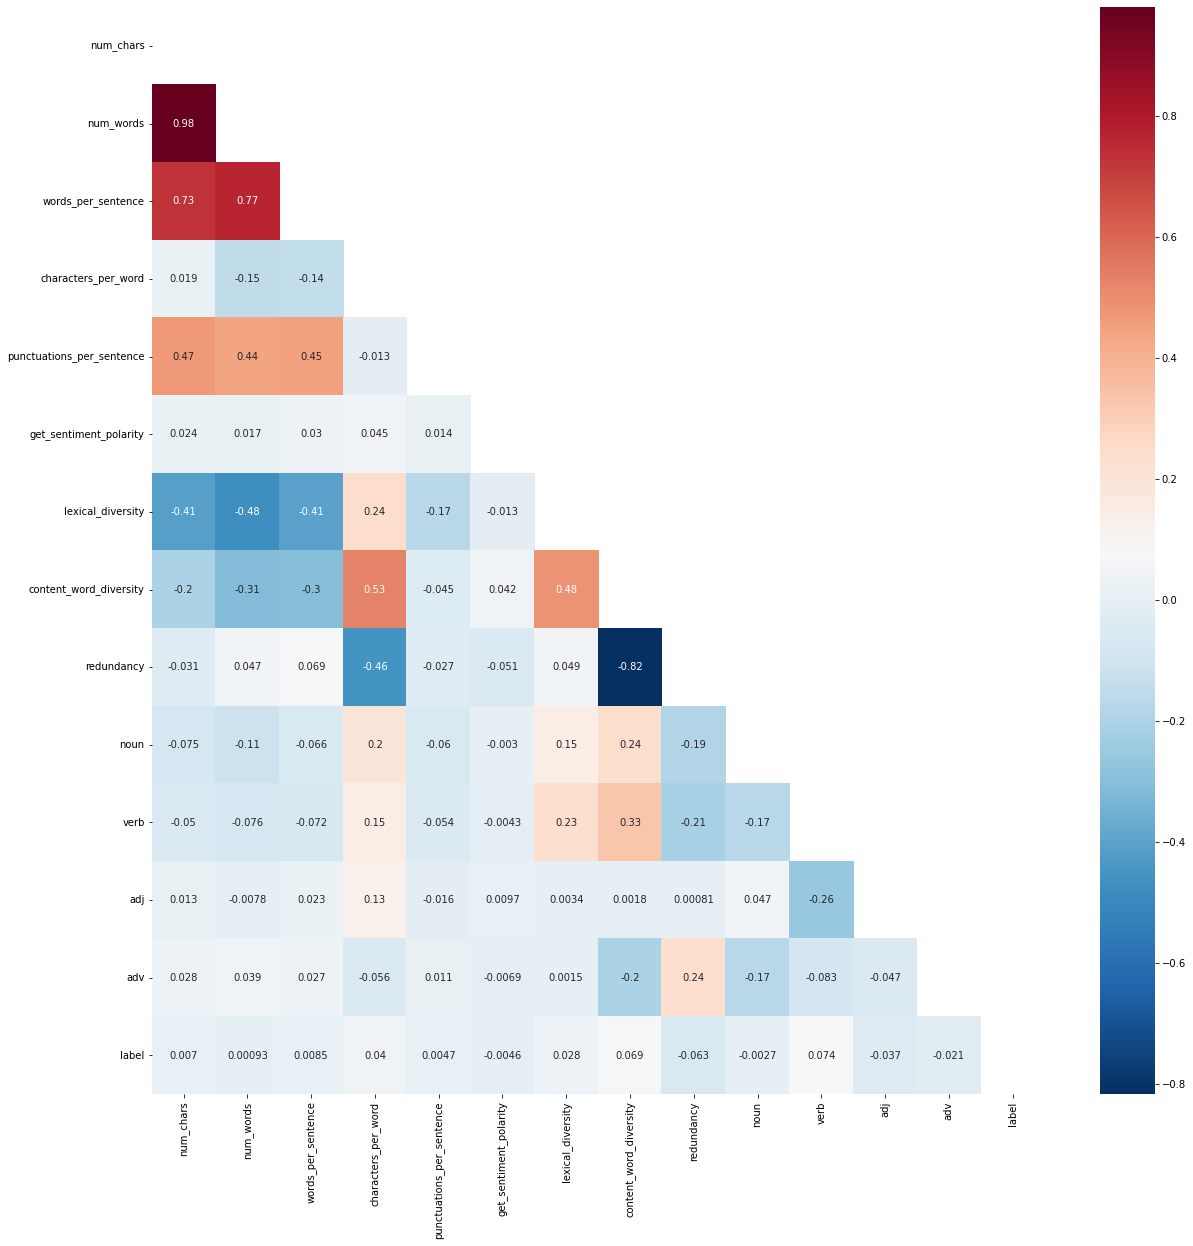

In [ ]:
# mask out upper triangle
mask = np.zeros_like(dfl[rfecv_features+["label"]].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,20))
sns.heatmap(dfl[rfecv_features+["label"]].corr(), 
           cmap='RdBu_r', 
           annot = True, 
           mask = mask
            )

In [ ]:
from sklearn import metrics
predicted_y = rfecv.predict(X_val)
gg=compute_metrics(predicted_y,y_val)
d=gg
tn, fp, fn, tp = d["confusiton_mat"].ravel()
# tn,fp,fn,tp=0,0,0,0
print("{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}".format('prec-t','prec-f', 'rec-t','rec-f','f1-t','f1-f','accu','tn', 'fp', 'fn', 'tp'))  # correct
print ("{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:}\t{:}\t{:}\t{:}".format(d['precision'][0],d['precision'][1], d['recall'][0],d['recall'][1],d['f1'][0],d['f1'][1],d['accuracy'],tn, fp, fn, tp))

prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp
0.213	0.840	0.091	0.934	0.128	0.884	0.796	19	189	70	989


## feature analysis welfake

In [ ]:
# len(df["welfake"]['text'])-len(df["welfake"]['text'].drop_duplicates())

0

In [ ]:
X=df["welfake"][sementic_features]
Y=df["welfake"].label

In [ ]:
Y.value_counts()

0    34620
1    28098
Name: label, dtype: int64

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.3, random_state=142,stratify=Y)

In [ ]:
X.head()

url_count  qn_symbol  ...  num_exclamation_per_sentence  url_count_per_sentence
0          0          7  ...                      0.045455                     0.0
1          0          1  ...                      0.000000                     0.0
2          0          0  ...                      0.000000                     0.0
3          0          1  ...                      0.000000                     0.0
4          0          0  ...                      0.000000                     0.0

[5 rows x 20 columns]

In [ ]:
# Feature ranking with recursive feature elimination and cross-validated selection of the best number of features

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

Optimal number of features : 19


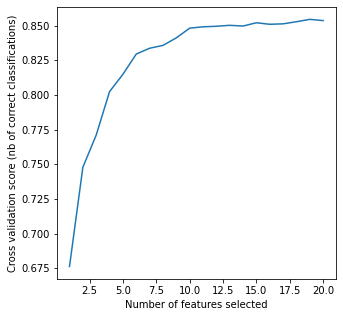

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100,max_features='auto',random_state=0,max_depth=14,class_weight='balanced')
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(),scoring='accuracy')
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

plt.figure(figsize=(5,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
rfecv.grid_scores_

array([0.67625621, 0.7477791 , 0.77103526, 0.80237811, 0.81486028,
       0.82946097, 0.83365217, 0.83570216, 0.84112337, 0.84813894,
       0.84911839, 0.84950562, 0.8501889 , 0.84966501, 0.85203398,
       0.85094063, 0.85125945, 0.8527856 , 0.85449403, 0.85360563])

In [ ]:
rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True])

In [ ]:
rfecv.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1])

In [ ]:
print(X_train.columns.values[rfecv.support_])

['url_count' 'qn_symbol' 'num_chars' 'num_words' 'num_sentences'
 'words_per_sentence' 'characters_per_word' 'punctuations_per_sentence'
 'num_exclamation' 'get_sentiment_polarity' 'lexical_diversity'
 'content_word_diversity' 'redundancy' 'noun' 'verb' 'adv'
 'qn_symbol_per_sentence' 'num_exclamation_per_sentence'
 'url_count_per_sentence']


In [ ]:
rfecv.estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
rfecv_features=list(X_train.columns.values[rfecv.support_])

In [ ]:
rfecv_features

['url_count',
 'qn_symbol',
 'num_chars',
 'num_words',
 'num_sentences',
 'words_per_sentence',
 'characters_per_word',
 'punctuations_per_sentence',
 'num_exclamation',
 'get_sentiment_polarity',
 'lexical_diversity',
 'content_word_diversity',
 'redundancy',
 'noun',
 'verb',
 'adv',
 'qn_symbol_per_sentence',
 'num_exclamation_per_sentence',
 'url_count_per_sentence']

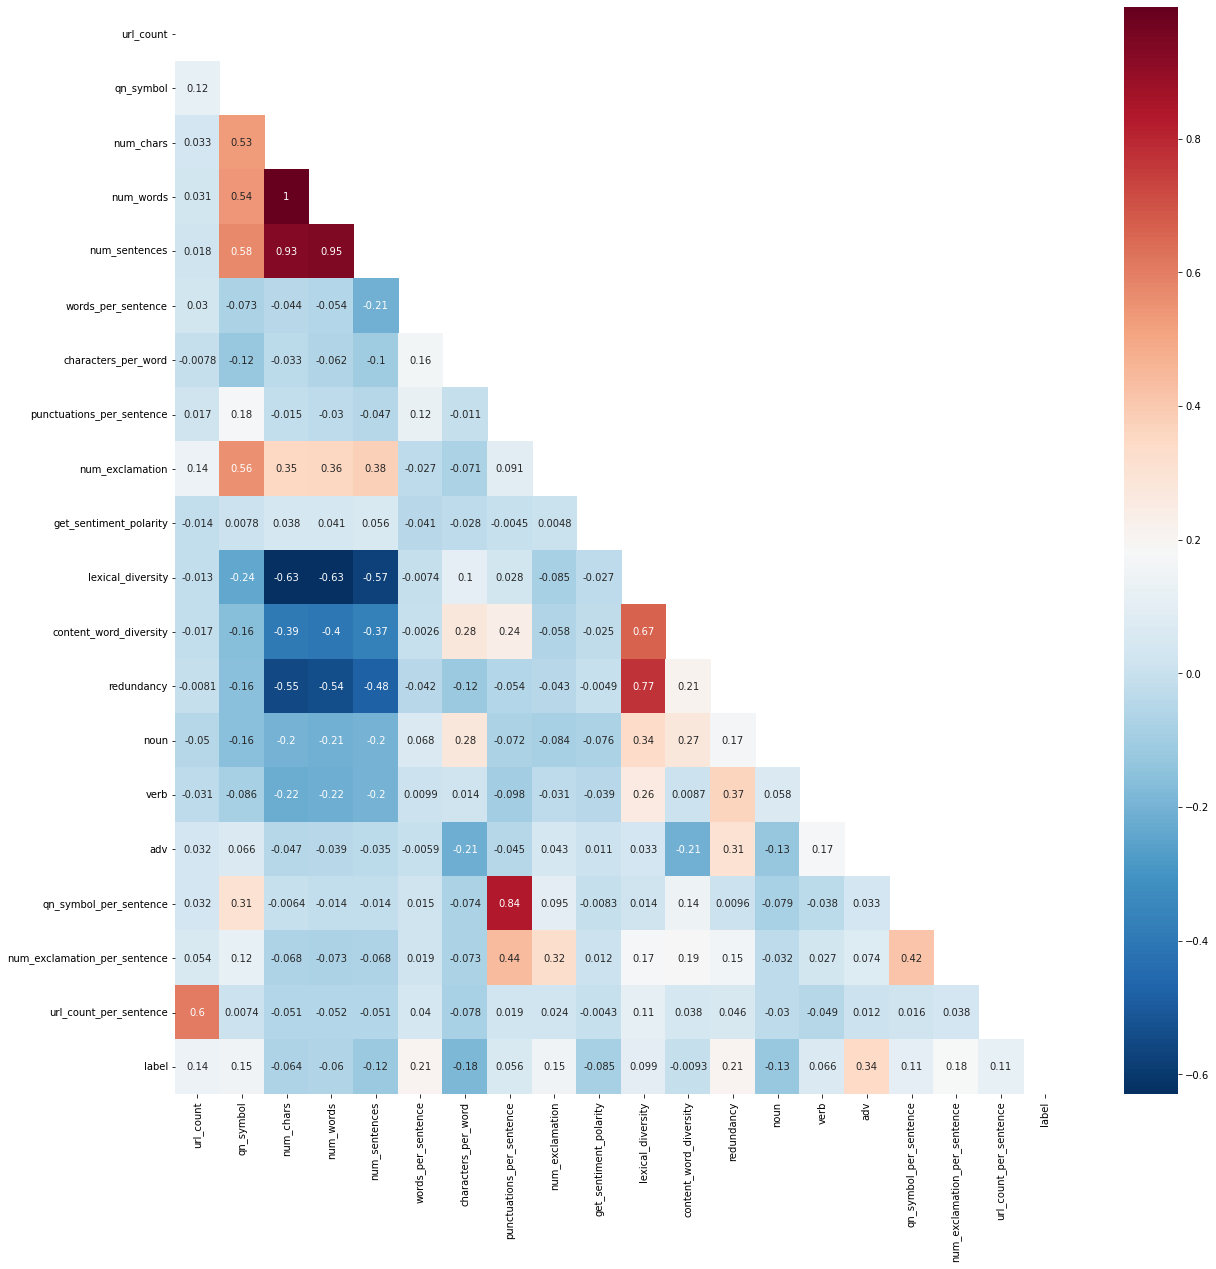

In [ ]:
# mask out upper triangle
mask = np.zeros_like(df["welfake"][rfecv_features+["label"]].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,20))
sns.heatmap(df["welfake"][rfecv_features+["label"]].corr(), 
           cmap='RdBu_r', 
           annot = True, 
           mask = mask
            )

In [ ]:
from sklearn import metrics
predicted_y = rfecv.predict(X_val)
gg=compute_metrics(predicted_y,y_val)
d=gg
tn, fp, fn, tp = d["confusiton_mat"].ravel()
print("{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}".format('prec-t','prec-f', 'rec-t','rec-f','f1-t','f1-f','accu','tn', 'fp', 'fn', 'tp'))  # correct
print ("{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:}\t{:}\t{:}\t{:}".format(d['precision'][0],d['precision'][1], d['recall'][0],d['recall'][1],d['f1'][0],d['f1'][1],d['accuracy'],tn, fp, fn, tp))

prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp
0.856	0.855	0.888	0.815	0.871	0.835	0.855	9220	1166	1556	6874


In [ ]:
welfakerfecv=rfecv

In [ ]:
# prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp
# 0.862	0.852	0.876	0.835	0.869	0.843	0.857	7724	1091	1236	6256


# prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp
# 0.859	0.855	0.881	0.830	0.870	0.842	0.857	7763	1052	1275	6217

# prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp
# 0.854	0.850	0.877	0.823	0.865	0.837	0.852	7730	1085	1324	6168

## feature analysis dfAll

In [ ]:
dfAllcopy=dfAll.copy()

In [ ]:
dfAllcopy["label"]=dfAllcopy["label"].replace(["half-true","false","barely-true","real","pants-fire","mostly-true","F","Fake","FAKE"],1).replace(["true","fake","T","Real","REAL"],0)

In [ ]:
dfAllcopy.drop(columns=["split"],inplace=True)

In [ ]:
df=dfAllcopy[sementic_features+["source","label"]]

In [ ]:
dfAllcopy=df.replace([np.inf, -np.inf], np.nan)
# Drop rows with NaN
dfAllcopy.dropna(inplace=True)

In [ ]:
len(dfAllcopy)

174894

In [ ]:
X=dfAllcopy[sementic_features]
Y=dfAllcopy.label
stratify=dfAllcopy[["source","label"]]

In [ ]:
dfAllcopy.label.value_counts()

0    103544
1     71350
Name: label, dtype: int64

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.3, random_state=142,stratify=stratify)

In [ ]:
stratify.groupby(["source","label"]).size()

source          label
codalab         0         5100
                1         5599
fakenewsnet     0        16402
                1         5322
isot            0        21192
                1         1090
kaggle          0        21191
                1        17455
kagglerealfake  0         2989
                1         3071
liar            0         2050
                1        10715
welfake         0        34620
                1        28098
dtype: int64

In [ ]:
# y_train.groupby(["source","label"]).size()

In [ ]:
X.head()

url_count  qn_symbol  ...  num_exclamation_per_sentence  url_count_per_sentence
0          0          1  ...                           0.0                     0.0
1          0          0  ...                           0.0                     0.0
2          0          0  ...                           0.0                     0.0
3          0          0  ...                           0.0                     0.0
4          0          0  ...                           0.0                     0.0

[5 rows x 20 columns]

Feature ranking with recursive feature elimination and cross-validated selection of the best number of features

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

Optimal number of features : 18


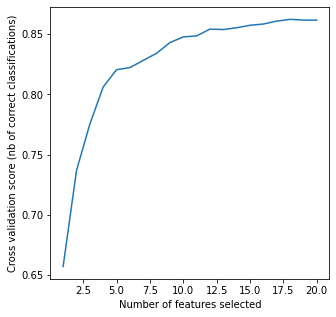

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100,max_features='auto',random_state=0,max_depth=14,class_weight='balanced')
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(),scoring='accuracy')
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

plt.figure(figsize=(5,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
rfecv.grid_scores_

array([0.65713962, 0.73675785, 0.77528366, 0.8061704 , 0.8205262 ,
       0.822275  , 0.82823482, 0.83414247, 0.8430344 , 0.84773265,
       0.84856786, 0.85424062, 0.85386649, 0.85537168, 0.85740762,
       0.85843427, 0.86087043, 0.86232339, 0.86171435, 0.86166216])

In [ ]:
rfecv.support_

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True])

In [ ]:
rfecv.ranking_

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1])

In [ ]:
print(X_train.columns.values[rfecv.support_])

['qn_symbol' 'num_chars' 'num_words' 'num_sentences' 'words_per_sentence'
 'characters_per_word' 'punctuations_per_sentence' 'num_exclamation'
 'get_sentiment_polarity' 'lexical_diversity' 'content_word_diversity'
 'redundancy' 'noun' 'verb' 'adv' 'qn_symbol_per_sentence'
 'num_exclamation_per_sentence' 'url_count_per_sentence']


In [ ]:
rfecv.estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
rfecv_features=list(X_train.columns.values[rfecv.support_])

In [ ]:
rfecv_features

['qn_symbol',
 'num_chars',
 'num_words',
 'num_sentences',
 'words_per_sentence',
 'characters_per_word',
 'punctuations_per_sentence',
 'num_exclamation',
 'get_sentiment_polarity',
 'lexical_diversity',
 'content_word_diversity',
 'redundancy',
 'noun',
 'verb',
 'adv',
 'qn_symbol_per_sentence',
 'num_exclamation_per_sentence',
 'url_count_per_sentence']

In [ ]:
# mask out upper triangle
mask = np.zeros_like(dfAllcopy[rfecv_features+["label"]].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,20))
sns.heatmap(dfAllcopy[rfecv_features+["label"]].corr(), 
           cmap='RdBu_r', 
           annot = True, 
           mask = mask
            )

In [ ]:
from sklearn import metrics
predicted_y = rfecv.predict(X_val)
gg=compute_metrics(predicted_y,y_val)
d=gg
tn, fp, fn, tp = d["confusiton_mat"].ravel()
print("{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}".format('prec-t','prec-f', 'rec-t','rec-f','f1-t','f1-f','accu','tn', 'fp', 'fn', 'tp'))  # correct
print ("{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:}\t{:}\t{:}\t{:}".format(d['precision'][0],d['precision'][1], d['recall'][0],d['recall'][1],d['f1'][0],d['f1'][1],d['accuracy'],tn, fp, fn, tp))

prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp
0.886	0.840	0.894	0.828	0.890	0.834	0.868	26414	3120	3388	16337


In [ ]:
# prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp
# 0.798	0.757	0.821	0.729	0.809	0.743	0.781	12549	2741	3168	8542

# prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp
# 0.797	0.756	0.821	0.727	0.809	0.741	0.780	12553	2740	3197	8510

# prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp
# 0.790	0.742	0.808	0.719	0.799	0.730	0.769	12361	2931	3293	8415

In [ ]:
# len(dfAll['text'])-len(dfAll['text'].drop_duplicates())

In [ ]:
# dfU=dfAll['text'].drop_duplicates()

In [ ]:
# dfF=dfAll.drop(dfU.index, axis=0)

In [ ]:
# dfF["text"][54683]

In [ ]:
# dfF["source"].value_counts()

In [ ]:
# ff=df["welfake"].append(df["isot"],ignore_index = True)

In [ ]:
# len(ff['text'])-len(ff['text'].drop_duplicates())

## Hyperparameter tuning

In [ ]:
!pip install TPOT -q

     |████████████████████████████████| 87 kB 2.7 MB/s 
     |████████████████████████████████| 173.6 MB 8.7 kB/s 
     |████████████████████████████████| 160 kB 54.1 MB/s 


In [ ]:
# from sklearn.ensemble import ExtraTreesClassifier

# model = ExtraTreesClassifier()

from tpot import TPOTClassifier

parameters = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [4, 12],
               'min_samples_split': [5, 10],
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}
               
tpot_classifier = TPOTClassifier(generations= 5, population_size= 24, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,
                                 config_dict=
                                 {'sklearn.ensemble.ExtraTreesClassifier': parameters}, 
                                 cv = 4, scoring = 'accuracy')
tpot_classifier.fit(X_train,y_train) 

Optimization Progress:   0%|          | 0/84 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8585029752219795

Generation 2 - Current best internal CV score: 0.8595507448016628

Generation 3 - Current best internal CV score: 0.8603024075722056

Generation 4 - Current best internal CV score: 0.8603024075722056

Generation 5 - Current best internal CV score: 0.8603024075722056

Best pipeline: ExtraTreesClassifier(ExtraTreesClassifier(input_matrix, criterion=gini, max_depth=935, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=850), criterion=gini, max_depth=671, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1200)


TPOTClassifier(config_dict={'sklearn.ensemble.ExtraTreesClassifier': {'criterion': ['entropy',
                                                                                    'gini'],
                                                                      'max_depth': [10,
                                                                                    142,
                                                                                    274,
                                                                                    406,
                                                                                    538,
                                                                                    671,
                                                                                    803,
                                                                                    935,
                                                                                    1067,
           

In [ ]:
Best pipeline: ExtraTreesClassifier(ExtraTreesClassifier(input_matrix, criterion=gini, max_depth=935, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=850), criterion=gini, max_depth=671, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1200)

In [ ]:
import numpy as np 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier

random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [4, 12],
               'min_samples_split': [5, 10],
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}

clf = ExtraTreesClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 80, 
                               cv = 4, verbose= 5, random_state= 101, n_jobs = -1)
model.fit(X_train,y_train) 

Fitting 4 folds for each of 80 candidates, totalling 320 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv=4, estimator=ExtraTreesClassifier(), n_iter=80, n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 142, 274, 406, 538,
                                                      671, 803, 935, 1067, 1200,
                                                      None],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [4, 12],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [151, 267, 384, 500,
                                                         617, 733, 850, 966,
                                                         1083, 1200]},
                   random_state=101, verbose=5)

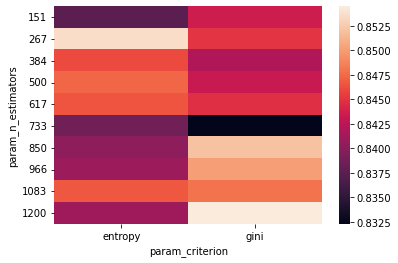

In [ ]:
import seaborn as sns

table = pd.pivot_table(pd.DataFrame(model.cv_results_),
    values='mean_test_score', index='param_n_estimators', 
                       columns='param_criterion')
     
sns.heatmap(table)

In [ ]:
from sklearn.metrics import classification_report

predictionforest = model.best_estimator_.predict(X_val)
print(confusion_matrix(y_val,predictionforest))
print(classification_report(y_val,predictionforest))
acc3 = accuracy_score(y_val,predictionforest)

[[9299 1087]
 [1546 6884]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     10386
           1       0.86      0.82      0.84      8430

    accuracy                           0.86     18816
   macro avg       0.86      0.86      0.86     18816
weighted avg       0.86      0.86      0.86     18816



In [ ]:
model.best_estimator_

ExtraTreesClassifier(criterion='entropy', max_depth=935, max_features=None,
                     min_samples_leaf=4, min_samples_split=5, n_estimators=151)

In [ ]:
# AllDF
import numpy as np 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier

random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [4, 12],
               'min_samples_split': [5, 10],
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}

clf = ExtraTreesClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 80, 
                               cv = 4, verbose= 5, random_state= 101, n_jobs = -1)
model.fit(X_train,y_train) 


In [ ]:
# ExtraTreesClassifier( ExtraTreesClassifier(
#     criterion="gini", 
#     max_depth=935, 
#     max_features="log2",
#     min_samples_leaf=4, 
#     min_samples_split=10, 
#     n_estimators=850
#     ), 
#     criterion="gini", 
#     max_depth=671, 
#     max_features="auto", 
#     min_samples_leaf=4, 
#     min_samples_split=10, 
#     # n_estimators=1200
# ) 

ExtraTreesClassifier(max_depth=671, min_samples_leaf=4, min_samples_split=10,
                     n_estimators=ExtraTreesClassifier(max_depth=935,
                                                       max_features='log2',
                                                       min_samples_leaf=4,
                                                       min_samples_split=10,
                                                       n_estimators=850))

In [ ]:
import seaborn as sns

table = pd.pivot_table(pd.DataFrame(model.cv_results_),
    values='mean_test_score', index='param_n_estimators', 
                       columns='param_criterion')
     
sns.heatmap(table)

In [ ]:
from sklearn.metrics import classification_report

predictionforest = model.best_estimator_.predict(X_val)
print(confusion_matrix(y_val,predictionforest))
print(classification_report(y_val,predictionforest))
acc3 = accuracy_score(y_val,predictionforest)

In [ ]:
model.best_estimator_

# compare different models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [ ]:
classifiers=[['Logistic Regression :',LogisticRegression()],
       ['Decision Tree Classification :',DecisionTreeClassifier()],
       ['Gradient Boosting Classification :', GradientBoostingClassifier()],
       ['Ada Boosting Classification :',AdaBoostClassifier()],
       ['Extra Tree Classification :', ExtraTreesClassifier()],
       ['K-Neighbors Classification :',KNeighborsClassifier()],
       ['Support Vector Classification :',SVC()],
       ['Gaussian Naive Bayes :',GaussianNB()]]
cla_pred=[]

In [ ]:
# ~ 4-5 min run 
for name,model1 in classifiers:
    print("-----------"+name+"-------------")
    model1.fit(X_train,y_train)
    predicted_y = model1.predict(X_val)
    score=compute_metrics(predicted_y,y_val)
    cla_pred.append(score)

-----------Logistic Regression :-------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


-----------Decision Tree Classification :-------------
-----------Gradient Boosting Classification :-------------
-----------Ada Boosting Classification :-------------
-----------Extra Tree Classification :-------------
-----------K-Neighbors Classification :-------------
-----------Support Vector Classification :-------------
-----------Gaussian Naive Bayes :-------------


In [ ]:
Y.value_counts()

0    50974
1    39025
Name: label, dtype: int64

In [ ]:
#Prining the evaluation matrix to the console
print("Summary\n Class 0- True news \n Class 1 - False news\n")
print("{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}".format('prec-t','prec-f', 'rec-t','rec-f','f1-t','f1-f','accu','tn', 'fp', 'fn', 'tp'))  # correct
for i in range(len(classifiers)):
  # print("-----------"+classifiers[i][0]+"-------------")
  d=cla_pred[i]
  tn, fp, fn, tp = cla_pred[i]["confusiton_mat"].ravel() #correct
  print ("{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:}\t{:}\t{:}\t{:}".format(d['precision'][0],d['precision'][1], d['recall'][0],d['recall'][1],d['f1'][0],d['f1'][1],d['accuracy'],tn, fp, fn, tp))

Summary
 Class 0- True news 
 Class 1 - False news

prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp
0.670	0.672	0.825	0.468	0.739	0.552	0.670	12620	2672	6226	5482
0.726	0.642	0.725	0.643	0.726	0.642	0.689	11088	4204	4184	7524
0.743	0.778	0.867	0.608	0.800	0.683	0.755	13259	2033	4589	7119
0.729	0.739	0.840	0.591	0.781	0.657	0.732	12852	2440	4788	6920
0.765	0.751	0.830	0.666	0.796	0.706	0.759	12699	2593	3905	7803
0.712	0.675	0.784	0.585	0.746	0.627	0.698	11994	3298	4853	6855
0.699	0.753	0.872	0.510	0.776	0.608	0.715	13332	1960	5741	5967
0.610	0.784	0.958	0.201	0.745	0.320	0.629	14643	649	9358	2350


In [ ]:
# -----------Decision Tree Classification :-------------
# -----------Gradient Boosting Classification :-------------
# -----------Ada Boosting Classification :-------------
# -----------Extra Tree Classification :-------------
# -----------K-Neighbors Classification :-------------
# -----------Support Vector Classification :-------------
# -----------Gaussian Naive Bayes :-------------

In [ ]:
# prec-t	prec-f	rec-t	rec-f	f1-t	f1-f	accu	tn	fp	fn	tp  (acc with counts)
  # 0.693	0.693	0.823	0.523	0.752	0.596	0.693	12581	2712	5586	6121
  # 0.742	0.666	0.746	0.660	0.744	0.663	0.709	11414	3879	3978	7729
  # 0.755	0.793	0.874	0.629	0.810	0.702	0.768	13371	1922	4344	7363
  # 0.731	0.752	0.850	0.592	0.786	0.662	0.738	13002	2291	4778	6929
  # 0.776	0.765	0.839	0.683	0.806	0.722	0.772	12835	2458	3707	8000
  # 0.692	0.665	0.792	0.540	0.739	0.596	0.683	12114	3179	5386	6321
  # 0.627	0.686	0.892	0.307	0.737	0.424	0.639	13649	1644	8113	3594
  # 0.623	0.792	0.950	0.249	0.752	0.378	0.646	14528	765	8796	2911

# SVc classifier

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
start = time.time()

svm_classifier = SVC(probability=True)
svm_classifier.fit(X_train,y_train)

end = time.time()
process = round(end-start,2)
print("Support Vector Machine Classifier has fitted, this process took {} seconds".format(process))

# print(svm_classifier.score(X_val,y_val))

In [ ]:
predicted_y = svm_classifier.predict(X_val)
print(predicted_y)

['false' 'false' 'false' ... 'half-true' 'half-true' 'half-true']


In [ ]:
gg=compute_metrics(predicted_y,y_val)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
gg

{'accuracy': 0.2249408050513023,
 'confusiton_mat': array([[  0,  74, 105,  33,   0,   0],
        [  0,  97, 105,  47,   0,   0],
        [  0,  93, 130,  42,   0,   0],
        [  0,  69, 114,  58,   0,   0],
        [  0,  35,  45,  12,   0,   0],
        [  0,  62,  90,  56,   0,   0]]),
 'f1': array([0.        , 0.28571429, 0.30444965, 0.23721881, 0.        ,
        0.        ]),
 'precision': array([0.        , 0.2255814 , 0.22071307, 0.23387097, 0.        ,
        0.        ]),
 'recall': array([0.        , 0.38955823, 0.49056604, 0.2406639 , 0.        ,
        0.        ])}

In [ ]:
d=gg
# tn, fp, fn, tp = d["confusiton_mat"].ravel()
tn,fp,fn,tp=0,0,0,0
print("{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}".format('prec-f','prec-t', 'rec-f','rec-t','f1-f','f1-t','accu','tn', 'fp', 'fn', 'tp'))
print ("{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:}\t{:}\t{:}\t{:}".format(d['precision'][0],d['precision'][1], d['recall'][0],d['recall'][1],d['f1'][0],d['f1'][1],d['accuracy'],tn, fp, fn, tp))

prec-f	prec-t	rec-f	rec-t	f1-f	f1-t	accu	tn	fp	fn	tp
0.000	0.226	0.000	0.390	0.000	0.286	0.225	0	0	0	0


In [ ]:
d=gg
tn, fp, fn, tp = d["confusiton_mat"].ravel()
# tn,fp,fn,tp=0,0,0,0
print("{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}".format('prec-f','prec-t', 'rec-f','rec-t','f1-f','f1-t','accu','tn', 'fp', 'fn', 'tp'))
print ("{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:}\t{:}\t{:}\t{:}".format(d['precision'][0],d['precision'][1], d['recall'][0],d['recall'][1],d['f1'][0],d['f1'][1],d['accuracy'],tn, fp, fn, tp))

In [ ]:
# prec-f	prec-t	rec-f	rec-t	f1-f	f1-t	accu	tn	fp	fn	tp
# 0.000	0.226	0.000	0.390	0.000	0.286	0.225	0	0	0	0             6 label

# K- Means

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 9)
# Building the clustering model and calculating the values of the Distortion and Inertia:
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) /len(X))
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / len(X)
    mapping2[k] = kmeanModel.inertia_

1 : 1135.97095129364
2 : 709.2842635049233
3 : 447.13501113776147
4 : 341.07547495980725
5 : 269.0041357751784
6 : 227.1199560981886
7 : 193.2792975681858
8 : 172.30746046629457


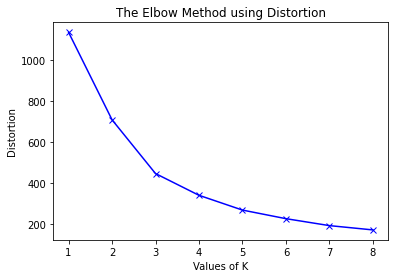

In [ ]:
# Using the different values of Distortion:
for key, val in mapping1.items():
    print(f'{key} : {val}')

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

1 : 101492237544.3723
2 : 33967243320.674633
3 : 14096182325.003077
4 : 8062431771.224383
5 : 5089620603.075904
6 : 3599006546.9642
7 : 2643418747.7247386
8 : 2054024795.7770631


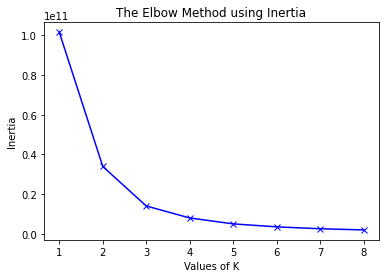

In [ ]:
# Using the different values of Inertia:
for key, val in mapping2.items():
    print(f'{key} : {val}')
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [ ]:
no_of_cluster= 2

In [ ]:
k_means_model=KMeans(n_clusters=no_of_cluster).fit(X)
# k_means_model=KMeans(n_clusters=no_of_cluster,random_state=0).fit(X)

In [ ]:
y_kmeans = list(k_means_model.predict(X))

In [ ]:
print("Number of predictions:",len(k_means_model.labels_))

Number of predictions: 50439


In [ ]:
pca = PCA(n_components=2).fit(X)

In [ ]:
datapoint = pca.transform(X).tolist()

In [ ]:
datapoints = pca.transform(X)

In [ ]:
len(datapoint)

50439

K-clustering


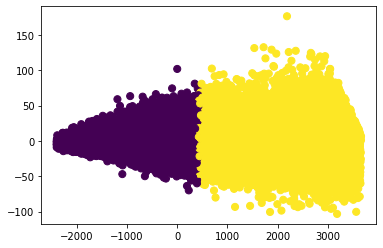

In [ ]:
print("K-clustering")
plt.scatter(datapoints[:, 0], datapoints[:, 1], c=y_kmeans, s=50, cmap='viridis')

True-Flase


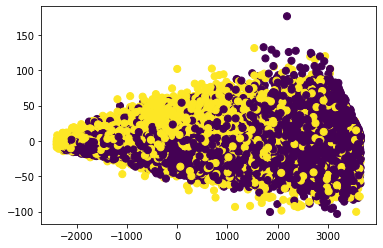

In [ ]:
print("True-Flase")
plt.scatter(datapoints[:, 0], datapoints[:, 1], c=Y, s=50, cmap='viridis')

In [ ]:
k0=[datapoint[i] for i in range(len(y_kmeans)) if y_kmeans[i]==0]
k1=[datapoint[i] for i in range(len(y_kmeans)) if y_kmeans[i]==1]

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16, 16) )
label1 = ["green", "red"]
color = [label1[Y[i]] for i in range(len(Y)) if  y_kmeans[i]==0 ]
plt.scatter([i[0] for i in k0], [i[1] for i in k0], c=color , marker=">" ,s=20*4  )  #cluster 1

color = [label1[Y[i]] for i in range(len(Y)) if  y_kmeans[i]==1 ]
plt.scatter([i[0] for i in k1], [i[1] for i in k1], c=color , marker="o" ,s=20*4)  #cluster 2
centroids = k_means_model.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
print("True-Flase")
plt.show()

# TensorBoard

In [ ]:
import tensorboard as tb
import tensorflow as tf

tf.io.gfile = tb.compat.tensorflow_stub.io.gfile
from torch.utils.tensorboard import SummaryWriter

In [ ]:
vectors = np.array(df["liar"][sementic_features])
metadata = df["liar"].label # labels
writer = SummaryWriter()
writer.add_embedding(vectors, metadata)
writer.close()

In [ ]:
!rm -fr runs

In [ ]:
metadata

In [ ]:
# %reload_ext tensorboard
# # %load_ext tensorboard
# %tensorboard --logdir=/content/runs